In [ ]:
"""
Created on Tue May  5 10:19:08 2020

@author: josephkarpinski
"""

https://www.sdss.org/dr16/irspec/targets/special-programs/

https://www.sdss.org/dr16/irspec/targets/

https://github.com/henrysky/astroNN_APOGEE_VAC

https://www.sdss.org/dr16/data_access/value-added-catalogs/?vac_id=the-astronn-catalog-of-abundances,-distances,-and-ages-for-apogee-dr16-stars

In [ ]:
import webbrowser

webbrowser.open('https://data.sdss.org/datamodel/files/APOGEE_ASTRONN/apogee_astronn.html') 


In [1]:
from IPython.display import display, HTML
display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

In [2]:

from http.client import BAD_REQUEST
import sys

from scipy.fftpack import fft
print(sys.executable)


import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

import scipy as sp

from scipy import *


import seaborn as sns 
#from mpl_toolkits import mplot3d
from scipy.stats import gaussian_kde


#import ipywidgets as widgets

#import ApogeeFunctionsNewCSV as ap

pd.set_option('display.max_rows', 2000)


print("\nInitialize!")

/Users/josephkarpinski/opt/anaconda3/bin/python

Initialize!


In [3]:
Ipython_default = plt.rcParams.copy()

# reset rcParams
#plt.rcParams.update(Ipython_default)

plt.style.use('dark_background')

print("Backup default plot background. \nSet Dark background.")

Backup default plot background. 
Set Dark background.



https://www.sdss.org/dr16/irspec/spectro_data/

https://www.sdss.org/dr16/data_access/value-added-catalogs/?vac_id=the-astronn-catalog-of-abundances,-distances,-and-ages-for-apogee-dr16-stars

In [4]:
from astropy.table import Table
from astropy.io import fits

tbl = Table.read('allStar-r12-l33.fits', format='fits', hdu=1)
names = [name for name in tbl.colnames if len(tbl[name].shape) <= 1]
df_allStar = tbl[names].to_pandas()

dat = Table.read('apogee_astroNN-DR16-v1.fits', format='fits', hdu=1)
df_astroNN = dat.to_pandas()

In [5]:
df_Match = df_allStar[df_allStar['APOGEE_ID'].isin(df_astroNN['APOGEE_ID'])]

df_Apogee = pd.merge(df_Match,df_astroNN, on='APOGEE_ID', suffixes=(None,'_astroNN'))#

In [6]:
for col in df_Apogee:
    if isinstance(df_Apogee[col][0], bytes):
        print(col, "will be transformed from bytestring to string")
        df_Apogee[col] = df_Apogee[col].str.decode("utf8")
        df_Apogee[col] = df_Apogee[col].str.strip()
print("Done!")

APSTAR_ID will be transformed from bytestring to string
TARGET_ID will be transformed from bytestring to string
ASPCAP_ID will be transformed from bytestring to string
FILE will be transformed from bytestring to string
APOGEE_ID will be transformed from bytestring to string
TELESCOPE will be transformed from bytestring to string
FIELD will be transformed from bytestring to string
TARGFLAGS will be transformed from bytestring to string
SURVEY will be transformed from bytestring to string
PROGRAMNAME will be transformed from bytestring to string
STARFLAGS will be transformed from bytestring to string
ANDFLAGS will be transformed from bytestring to string
APSTAR_VERSION will be transformed from bytestring to string
ASPCAP_VERSION will be transformed from bytestring to string
RESULTS_VERSION will be transformed from bytestring to string
ASPCAP_CLASS will be transformed from bytestring to string
ASPCAPFLAGS will be transformed from bytestring to string
ALT_ID will be transformed from bytest

In [8]:
df_Apogee['BP_RP']   = df_Apogee['GAIA_PHOT_BP_MEAN_MAG']  - df_Apogee['GAIA_PHOT_RP_MEAN_MAG']
df_Apogee['LightYears'] =  abs(((1 / df_Apogee['GAIA_PARALLAX']) * 3.26 * 1000))
df_Apogee['Parsec'] =  abs(((1 / df_Apogee['GAIA_PARALLAX']) * 1000))
df_Apogee['Kpc'] =  abs(((1 / df_Apogee['GAIA_PARALLAX'])))

df_Apogee['M'] = df_Apogee['GAIA_PHOT_G_MEAN_MAG'] + 5*np.log10(df_Apogee['GAIA_PARALLAX']) - 10

df_Apogee['LY'] = abs(3261.56/df_Apogee['GAIA_PARALLAX'])

df_Apogee['L_sun'] = np.power(10,[(4.77-m)/2.5 for m in df_Apogee['M']])

df_Apogee['T_K'] = [5601/np.power(c+0.4,2/3) for c in df_Apogee['BP_RP']]

df_Apogee['R_sun']=np.around(np.sqrt(df_Apogee['L_sun'])/(df_Apogee['T_K']/5800)**2, decimals=2) # T_☉ = 5800

In [9]:

pd.options.display.max_columns = None
pd.set_option('display.max_rows', 2000)

df_Apogee .columns.sort_values().tolist()


['AK_TARG',
 'AK_TARG_METHOD',
 'AK_WISE',
 'ALL_VISITS',
 'ALPHA_M',
 'ALPHA_M_ERR',
 'ALT_ID',
 'AL_FE',
 'AL_FE_ERR',
 'AL_FE_FLAG',
 'AL_H',
 'AL_H_ERR',
 'ANDFLAG',
 'ANDFLAGS',
 'APOGEE2_TARGET1',
 'APOGEE2_TARGET2',
 'APOGEE2_TARGET3',
 'APOGEE_ID',
 'APOGEE_TARGET1',
 'APOGEE_TARGET2',
 'APOGEE_TARGET3',
 'APSTAR_ID',
 'APSTAR_VERSION',
 'ASPCAPFLAG',
 'ASPCAPFLAGS',
 'ASPCAP_CHI2',
 'ASPCAP_CLASS',
 'ASPCAP_ID',
 'ASPCAP_VERSION',
 'BP_RP',
 'CA_FE',
 'CA_FE_ERR',
 'CA_FE_FLAG',
 'CA_H',
 'CA_H_ERR',
 'CE_FE',
 'CE_FE_ERR',
 'CE_FE_FLAG',
 'CI_FE',
 'CI_FE_ERR',
 'CI_FE_FLAG',
 'CI_H',
 'CI_H_ERR',
 'COMBTYPE',
 'COMMISS',
 'CO_FE',
 'CO_FE_ERR',
 'CO_FE_FLAG',
 'CO_H',
 'CO_H_ERR',
 'CR_FE',
 'CR_FE_ERR',
 'CR_FE_FLAG',
 'CR_H',
 'CR_H_ERR',
 'CU_FE',
 'CU_FE_ERR',
 'CU_FE_FLAG',
 'C_FE',
 'C_FE_ERR',
 'C_FE_FLAG',
 'C_H',
 'C_H_ERR',
 'DDO51',
 'DDO51_ERR',
 'DEC',
 'DEC_APOGEE',
 'DEC_astroNN',
 'EXTRATARG',
 'EminusEc',
 'EminusEc_err',
 'Energy',
 'Energy_err',
 'FE_H',
 

In [10]:
# Use BP_RP value to group stars into classes

s1 = df_Apogee

s1Label = "All"

print('\n' + s1Label + ': Stars '   + str(s1.shape[0]))

Fd1 = s1[s1['ASPCAP_CLASS'].isin(['Fd_a', 'Fd_b', 'Fd_c', 'Fd_d'])]
GKd1 = s1[s1['ASPCAP_CLASS'].isin(['GKd_a', 'GKd_b', 'GKd_c', 'GKd_d'])]
GKg1 = s1[s1['ASPCAP_CLASS'].isin(['GKg_a', 'GKg_b', 'GKg_c', 'GKg_d'])]
Md1 = s1[s1['ASPCAP_CLASS'].isin(['Md_a', 'Md_b', 'Md_c', 'Md_d'])]
Mg1 = s1[s1['ASPCAP_CLASS'].isin(['Mg_a', 'Mg_b', 'Mg_c', 'Mg_d'])]

print("\nFd: " + str(Fd1.shape[0]))
print("GKd: " + str(GKd1.shape[0]))
print("GKg: " + str(GKg1.shape[0]))
print("Md: " + str(Md1.shape[0]))
print("Mg: " + str(Mg1.shape[0]))


idx_BA  = sp.where( (s1['ASPCAP_CLASS'] == 'BA') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]

idx_Fd_a = sp.where( (s1['ASPCAP_CLASS'] == 'Fd_a') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]
idx_Fd_b = sp.where( (s1['ASPCAP_CLASS'] == 'Fd_b') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]
idx_Fd_c = sp.where( (s1['ASPCAP_CLASS'] == 'Fd_c') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]
idx_Fd_d = sp.where( (s1['ASPCAP_CLASS'] == 'Fd_d') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]

idx_GKd_a = sp.where( (s1['ASPCAP_CLASS'] == 'GKd_a') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]
idx_GKd_b = sp.where( (s1['ASPCAP_CLASS'] == 'GKd_b') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]
idx_GKd_c = sp.where( (s1['ASPCAP_CLASS'] == 'GKd_c') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]
idx_GKd_d = sp. where( (s1['ASPCAP_CLASS'] == 'GKd_d') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]

idx_GKg_a = sp.where( (s1['ASPCAP_CLASS'] == 'GKg_a') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]
idx_GKg_b = sp.where( (s1['ASPCAP_CLASS'] == 'GKg_b') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]
idx_GKg_c = sp.where( (s1['ASPCAP_CLASS'] == 'GKg_c') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]
idx_GKg_d = sp.where( (s1['ASPCAP_CLASS'] == 'GKg_d') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]

idx_Md_b = sp.where( (s1['ASPCAP_CLASS'] == 'Md_b') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]
idx_Md_c = sp.where( (s1['ASPCAP_CLASS'] == 'Md_c') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]
idx_Md_d = sp.where( (s1['ASPCAP_CLASS'] == 'Md_d') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]
idx_Md_a = sp.where( (s1['ASPCAP_CLASS'] == 'Md_a') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]

idx_Mg_a = sp.where( (s1['ASPCAP_CLASS'] == 'Mg_a') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]
idx_Mg_b = sp.where( (s1['ASPCAP_CLASS'] == 'Mg_b') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]
idx_Mg_c = sp.where( (s1['ASPCAP_CLASS'] == 'Mg_c') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]
idx_Mg_d = sp.where( (s1['ASPCAP_CLASS'] == 'Mg_d') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]



print('\nBA' + ': Stars '   + str(idx_BA.shape[0]))

print('\nFd_a' + ': Stars '   + str(idx_Fd_a.shape[0]))
print('Fd_b' + ': Stars '     + str(idx_Fd_b.shape[0]))
print('Fd_c' + ': Stars '     + str(idx_Fd_c.shape[0]))
print('Fd_d' + ': Stars '     + str(idx_Fd_d.shape[0]))


print('\nGKd_a' + ': Stars '   + str(idx_GKd_a.shape[0]))
print('GKd_b' + ': Stars '     + str(idx_GKd_b.shape[0]))
print('GKd_c' + ': Stars '     + str(idx_GKd_c.shape[0]))
print('GKd_d' + ': Stars '     + str(idx_GKd_d.shape[0]))


print('\nGKg_a' + ': Stars '   + str(idx_GKg_a.shape[0]))
print('GKg_b' + ': Stars '     + str(idx_GKg_b.shape[0]))
print('GKg_c' + ': Stars '     + str(idx_GKg_c.shape[0]))
print('GKg_d' + ': Stars '     + str(idx_GKg_d.shape[0]))


print('\nMd_a' + ': Stars '   + str(idx_Md_a.shape[0]))
print('Md_b' + ': Stars '     + str(idx_Md_b.shape[0]))
print('Md_c' + ': Stars '     + str(idx_Md_c.shape[0]))
print('Md_d' + ': Stars '     + str(idx_Md_d.shape[0]))


print('\nMg_a' + ': Stars '   + str(idx_Mg_a.shape[0]))
print('Mg_b' + ': Stars '     + str(idx_Mg_b.shape[0]))
print('Mg_c' + ': Stars '     + str(idx_Mg_c.shape[0]))
print('Mg_d' + ': Stars '     + str(idx_Mg_d.shape[0]))


All: Stars 577943

Fd: 56952
GKd: 127166
GKg: 279183
Md: 34223
Mg: 54757

BA: Stars 7604

Fd_a: Stars 12119
Fd_b: Stars 14693
Fd_c: Stars 14009
Fd_d: Stars 6821

GKd_a: Stars 26868
GKd_b: Stars 40827
GKd_c: Stars 40840
GKd_d: Stars 18143

GKg_a: Stars 66468
GKg_b: Stars 86962
GKg_c: Stars 88862
GKg_d: Stars 36667

Md_a: Stars 7004
Md_b: Stars 11189
Md_c: Stars 11226
Md_d: Stars 4797

Mg_a: Stars 16364
Mg_b: Stars 15924
Mg_c: Stars 15487
Mg_d: Stars 6981


In [11]:

def Plot002(f1):
    plt.style.use('dark_background')
    s0 = f1[f1['LOGG'] > 0]
    s1 = s0[s0['GAIA_PHOT_G_MEAN_MAG'] > -9999]
    ff1 = s1[(s1['BP_RP'] > -9999) & (s1['BP_RP'] < 9999)]
    BA1 = ff1[ff1['ASPCAP_CLASS'].isin(['BA'])]
    Fd1 = ff1[ff1['ASPCAP_CLASS'].isin(['Fd_a', 'Fd_b', 'Fd_c', 'Fd_d'])]
    GKd1 = ff1[ff1['ASPCAP_CLASS'].isin(['GKd_a', 'GKd_b', 'GKd_c', 'GKd_d'])]
    GKg1 = ff1[ff1['ASPCAP_CLASS'].isin(['GKg_a', 'GKg_b', 'GKg_c', 'GKg_d'])]
    Md1 = ff1[ff1['ASPCAP_CLASS'].isin(['Md_a', 'Md_b', 'Md_c', 'Md_d'])]
    Mg1 = ff1[ff1['ASPCAP_CLASS'].isin(['Mg_a', 'Mg_b', 'Mg_c', 'Mg_d'])]
    RA1 = int(round(ff1.RA.median(),0))
    DEC1 = int(round(ff1.DEC.median(),0))
    GLON1 = int(round(ff1.GLON.median(),0))
    GLAT1 = int(round(ff1.GLAT.median(),0))
    s1Label = "TEFF"
    fig = plt.figure(figsize=(15, 12))
    plt.subplot(111)
    if BA1.shape[0] > 0:
        plt.scatter(BA1['BP_RP'], BA1['M'], label=('BA stars: ' + str(BA1.shape[0])), marker='o', linewidth=0,s=30,c='violet')
    plt.scatter(Fd1['BP_RP'], Fd1['M'], label=('Fd stars: ' + str(Fd1.shape[0])), marker='o', linewidth=0,s=20,c='b')
    plt.scatter(GKd1['BP_RP'], GKd1['M'], label=('GKd stars: ' + str(GKd1.shape[0])), marker='o', linewidth=0,s=20,c='g')
    plt.scatter(GKg1['BP_RP'], GKg1['M'], label=('GKg stars: ' + str(GKg1.shape[0])), marker='o', linewidth=0,s=20,c='orange')
    plt.scatter(Mg1['BP_RP'], Mg1['M'], label=('Mg stars: ' + str(Mg1.shape[0])), marker='o', linewidth=0,s=20,c='r')
    if Md1.shape[0] > 0:
        plt.scatter(Md1['BP_RP'], Md1['M'], label=('Md stars: ' + str(Md1.shape[0])), marker='o', linewidth=0,s=20,c='aqua')
    ax = plt.gca()
    plt.gca().invert_yaxis()
    plt.xlabel('BP_RP', fontsize=15)
    plt.ylabel('Absolute Magnitude', fontsize=15)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.grid()
    plt.legend(fontsize=15)
    plt.title(str(field) + '\nHertzsprung-Russel Diagram' + 
                          "\nGLON: " + str(GLON1) + "  GLAT: " + str(GLAT1) +
                          "\nRA: " + str(RA1) + "  DEC: " + str(DEC1), fontsize=15)
    plt.show() 
    

    

In [12]:
def Plot002B(f1, field):
    #import math
    ff1 = f1[(f1['FE_H'] > -9999) & (f1['FE_H'] < 9999)]
    BA1 = ff1[ff1['ASPCAP_CLASS'].isin(['BA'])]
    Fd1 = ff1[ff1['ASPCAP_CLASS'].isin(['Fd_a', 'Fd_b', 'Fd_c', 'Fd_d'])]
    GKd1 = ff1[ff1['ASPCAP_CLASS'].isin(['GKd_a', 'GKd_b', 'GKd_c', 'GKd_d'])]
    GKg1 = ff1[ff1['ASPCAP_CLASS'].isin(['GKg_a', 'GKg_b', 'GKg_c', 'GKg_d'])]
    Md1 = ff1[ff1['ASPCAP_CLASS'].isin(['Md_a', 'Md_b', 'Md_c', 'Md_d'])]
    Mg1 = ff1[ff1['ASPCAP_CLASS'].isin(['Mg_a', 'Mg_b', 'Mg_c', 'Mg_d'])]

    #print("\nField: " + str(field))
    print("\nClass \tAge Gyr \tFe_H \tAL_FE \tC_FE \tCA_FE \tCE_FE \tCI_FE \tCO_FE \tCR_FE \tK_FE \tMG_FE \tMN_FE \tNA_FE \tN_FE \tO_FE \tP_FE \tSI_FE \tV_FE \tRV \tParsecs \tLightYears".expandtabs(10))

    if Fd1.shape[0] > 0:
        AGE1 = float(round(Fd1.age.median(),2))
        FEH1 = float(round(Fd1.FE_H.median(),2))
        VHELIO_AVG1 = int(round(Fd1[Fd1.VHELIO_AVG > -4000].VHELIO_AVG.median(),2))
        DIST1 = int(round(Fd1[Fd1.Parsec > -99].Parsec.median(),2))
        LY1 = int(round(Fd1[Fd1.LY > -99].LY.median(),2))
        AL1 = float(round(Fd1[Fd1.AL_FE > -99].AL_FE.median(),2))
        CA1 = float(round(Fd1[Fd1.CA_FE > -99].CA_FE.median(),2))
        CE1 = float(round(Fd1[Fd1.CE_FE > -99].CE_FE.median(),2))
        CI1 = float(round(Fd1[Fd1.CI_FE > -99].CI_FE.median(),2))
        CO1 = float(round(Fd1[Fd1.CO_FE > -99].CO_FE.median(),2))
        CR1 = float(round(Fd1[Fd1.CR_FE > -99].CR_FE.median(),2))
        C1 = float(round(Fd1[Fd1.C_FE > -99].C_FE.median(),2))
        K1 = float(round(Fd1[Fd1.K_FE > -99].K_FE.median(),2))
        MG1 = float(round(Fd1[Fd1.MG_FE > -99].MG_FE.median(),2))
        MN1 = float(round(Fd1[Fd1.MN_FE > -99].MN_FE.median(),2))
        NA1 = float(round(Fd1[Fd1.NA_FE > -99].NA_FE.median(),2))
        N1 = float(round(Fd1[Fd1.N_FE > -99].N_FE.median(),2))
        O1 = float(round(Fd1[Fd1.O_FE > -99].O_FE.median(),2))
        P1 = float(round(Fd1[Fd1.P_FE > -99].P_FE.median(),2))
        SI1 = float(round(Fd1[Fd1.SI_FE > -99].SI_FE.median(),2))
        V1 = float(round(Fd1[Fd1.V_FE > -99].V_FE.median(),2))
        str1 = str("Fd " + 
        "  \t" + str(AGE1) + 
        "  \t" + str(FEH1)  + 
        "  \t" + str(AL1) +
        "  \t" + str(C1) +
        "  \t" + str(CA1) +
        "  \t" + str(CE1) +
        "  \t" + str(CI1) +
        "  \t" + str(CO1) +
        "  \t" + str(CR1) +
        "  \t" + str(K1) +
        "  \t" + str(MG1) +
        "  \t" + str(MN1) +
        "  \t" + str(NA1) +
        "  \t" + str(N1) +
        "  \t" + str(O1) +
        "  \t" + str(P1) +
        "  \t" + str(SI1) +
        "  \t" + str(V1) +
        "  \t" + str(VHELIO_AVG1) +
        "  \t" + str(DIST1) +
        "  \t" + str(LY1))
        print(str1.expandtabs(10))

    if GKd1.shape[0] > 0:
        AGE1 = float(round(GKd1.age.median(),2))
        FEH1 = float(round(GKd1.FE_H.median(),2))
        VHELIO_AVG1 = int(round(GKd1[GKd1.VHELIO_AVG > -4000].VHELIO_AVG.median(),2))
        DIST1 = int(round(GKd1[GKd1.Parsec > -99].Parsec.median(),2))
        LY1 = int(round(GKd1[GKd1.LY > -99].LY.median(),2))
        AL1 = float(round(GKd1[GKd1.AL_FE > -99].AL_FE.median(),2))
        CA1 = float(round(GKd1[GKd1.CA_FE > -99].CA_FE.median(),2))
        CE1 = float(round(GKd1[GKd1.CE_FE > -99].CE_FE.median(),2))
        CI1 = float(round(GKd1[GKd1.CI_FE > -99].CI_FE.median(),2))
        CO1 = float(round(GKd1[GKd1.CO_FE > -99].CO_FE.median(),2))
        CR1 = float(round(GKd1[GKd1.CR_FE > -99].CR_FE.median(),2))
        C1 = float(round(GKd1[GKd1.C_FE > -99].C_FE.median(),2))
        K1 = float(round(GKd1[GKd1.K_FE > -99].K_FE.median(),2))
        MG1 = float(round(GKd1[GKd1.MG_FE > -99].MG_FE.median(),2))
        MN1 = float(round(GKd1[GKd1.MN_FE > -99].MN_FE.median(),2))
        NA1 = float(round(GKd1[GKd1.NA_FE > -99].NA_FE.median(),2))
        N1 = float(round(GKd1[GKd1.N_FE > -99].N_FE.median(),2))
        O1 = float(round(GKd1[GKd1.O_FE > -99].O_FE.median(),2))
        P1 = float(round(GKd1[GKd1.P_FE > -99].P_FE.median(),2))
        SI1 = float(round(GKd1[GKd1.SI_FE > -99].SI_FE.median(),2))
        V1 = float(round(GKd1[GKd1.V_FE > -99].V_FE.median(),2))
        str1 = str("GKd " + 
        "  \t" + str(AGE1) + 
        "  \t" + str(FEH1)  + 
        "  \t" + str(AL1) +
        "  \t" + str(C1) +
        "  \t" + str(CA1) +
        "  \t" + str(CE1) +
        "  \t" + str(CI1) +
        "  \t" + str(CO1) +
        "  \t" + str(CR1) +
        "  \t" + str(K1) +
        "  \t" + str(MG1) +
        "  \t" + str(MN1) +
        "  \t" + str(NA1) +
        "  \t" + str(N1) +
        "  \t" + str(O1) +
        "  \t" + str(P1) +
        "  \t" + str(SI1) +
        "  \t" + str(V1) +
        "  \t" + str(VHELIO_AVG1) +
        "  \t" + str(DIST1) +
        "  \t" + str(LY1))
        print(str1.expandtabs(10))

    if GKg1.shape[0] > 0:
        AGE1 = float(round(GKg1.age.median(),2))
        FEH1 = float(round(GKg1.FE_H.median(),2))
        VHELIO_AVG1 = int(round(GKg1[GKg1.VHELIO_AVG > -4000].VHELIO_AVG.median(),2))
        DIST1 = int(round(GKg1[GKg1.Parsec > -99].Parsec.median(),2))
        LY1 = int(round(GKg1[GKg1.LY > -99].LY.median(),2))
        AL1 = float(round(GKg1[GKg1.AL_FE > -99].AL_FE.median(),2))
        CA1 = float(round(GKg1[GKg1.CA_FE > -99].CA_FE.median(),2))
        CE1 = float(round(GKg1[GKg1.CE_FE > -99].CE_FE.median(),2))
        CI1 = float(round(GKg1[GKg1.CI_FE > -99].CI_FE.median(),2))
        CO1 = float(round(GKg1[GKg1.CO_FE > -99].CO_FE.median(),2))
        CR1 = float(round(GKg1[GKg1.CR_FE > -99].CR_FE.median(),2))
        C1 = float(round(GKg1[GKg1.C_FE > -99].C_FE.median(),2))
        K1 = float(round(GKg1[GKg1.K_FE > -99].K_FE.median(),2))
        MG1 = float(round(GKg1[GKg1.MG_FE > -99].MG_FE.median(),2))
        MN1 = float(round(GKg1[GKg1.MN_FE > -99].MN_FE.median(),2))
        NA1 = float(round(GKg1[GKg1.NA_FE > -99].NA_FE.median(),2))
        N1 = float(round(GKg1[GKg1.N_FE > -99].N_FE.median(),2))
        O1 = float(round(GKg1[GKg1.O_FE > -99].O_FE.median(),2))
        P1 = float(round(GKg1[GKg1.P_FE > -99].P_FE.median(),2))
        SI1 = float(round(GKg1[GKg1.SI_FE > -99].SI_FE.median(),2))
        V1 = float(round(GKg1[GKg1.V_FE > -99].V_FE.median(),2))
        str1 = str("Gkg " + 
        "  \t" + str(AGE1) + 
        "  \t" + str(FEH1)  + 
        "  \t" + str(AL1) +
        "  \t" + str(C1) +
        "  \t" + str(CA1) +
        "  \t" + str(CE1) +
        "  \t" + str(CI1) +
        "  \t" + str(CO1) +
        "  \t" + str(CR1) +
        "  \t" + str(K1) +
        "  \t" + str(MG1) +
        "  \t" + str(MN1) +
        "  \t" + str(NA1) +
        "  \t" + str(N1) +
        "  \t" + str(O1) +
        "  \t" + str(P1) +
        "  \t" + str(SI1) +
        "  \t" + str(V1) +
        "  \t" + str(VHELIO_AVG1) +
        "  \t" + str(DIST1) +
        "  \t" + str(LY1))
        print(str1.expandtabs(10))

    if Md1.shape[0] > 0:
        AGE1 = float(round(Md1.age.median(),2))
        FEH1 = float(round(Md1.FE_H.median(),2))
        VHELIO_AVG1 = int(round(Md1[Md1.VHELIO_AVG > -4000].VHELIO_AVG.median(),2))
        DIST1 = int(round(Md1[Md1.Parsec > -99].Parsec.median(),2))
        LY1 = int(round(Md1[Md1.LY > -99].LY.median(),2))
        AL1 = float(round(Md1[Md1.AL_FE > -99].AL_FE.median(),2))
        CA1 = float(round(Md1[Md1.CA_FE > -99].CA_FE.median(),2))
        CE1 = float(round(Md1[Md1.CE_FE > -99].CE_FE.median(),2))
        CI1 = float(round(Md1[Md1.CI_FE > -99].CI_FE.median(),2))
        CO1 = float(round(Md1[Md1.CO_FE > -99].CO_FE.median(),2))
        CR1 = float(round(Md1[Md1.CR_FE > -99].CR_FE.median(),2))
        C1 = float(round(Md1[Md1.C_FE > -99].C_FE.median(),2))
        K1 = float(round(Md1[Md1.K_FE > -99].K_FE.median(),2))
        MG1 = float(round(Md1[Md1.MG_FE > -99].MG_FE.median(),2))
        MN1 = float(round(Md1[Md1.MN_FE > -99].MN_FE.median(),2))
        NA1 = float(round(Md1[Md1.NA_FE > -99].NA_FE.median(),2))
        N1 = float(round(Md1[Md1.N_FE > -99].N_FE.median(),2))
        O1 = float(round(Md1[Md1.O_FE > -99].O_FE.median(),2))
        P1 = float(round(Md1[Md1.P_FE > -99].P_FE.median(),2))
        SI1 = float(round(Md1[Md1.SI_FE > -99].SI_FE.median(),2))
        V1 = float(round(Md1[Md1.V_FE > -99].V_FE.median(),2))
        str1 = str("Md " + 
        "  \t" + str(AGE1) + 
        "  \t" + str(FEH1)  + 
        "  \t" + str(AL1) +
        "  \t" + str(C1) +
        "  \t" + str(CA1) +
        "  \t" + str(CE1) +
        "  \t" + str(CI1) +
        "  \t" + str(CO1) +
        "  \t" + str(CR1) +
        "  \t" + str(K1) +
        "  \t" + str(MG1) +
        "  \t" + str(MN1) +
        "  \t" + str(NA1) +
        "  \t" + str(N1) +
        "  \t" + str(O1) +
        "  \t" + str(P1) +
        "  \t" + str(SI1) +
        "  \t" + str(V1) +
        "  \t" + str(VHELIO_AVG1) +
        "  \t" + str(DIST1) +
        "  \t" + str(LY1))
        print(str1.expandtabs(10))

    if Mg1.shape[0] > 0:
        AGE1 = float(round(Mg1.age.median(),2))
        FEH1 = float(round(Mg1.FE_H.median(),2))
        VHELIO_AVG1 = int(round(Mg1[Mg1.VHELIO_AVG > -4000].VHELIO_AVG.median(),2))
        DIST1 = int(round(Mg1[Mg1.Parsec > -99].Parsec.median(),2))
        LY1 = int(round(Mg1[Mg1.LY > -99].LY.median(),2))
        AL1 = float(round(Mg1[Mg1.AL_FE > -99].AL_FE.median(),2))
        CA1 = float(round(Mg1[Mg1.CA_FE > -99].CA_FE.median(),2))
        CE1 = float(round(Mg1[Mg1.CE_FE > -99].CE_FE.median(),2))
        CI1 = float(round(Mg1[Mg1.CI_FE > -99].CI_FE.median(),2))
        CO1 = float(round(Mg1[Mg1.CO_FE > -99].CO_FE.median(),2))
        CR1 = float(round(Mg1[Mg1.CR_FE > -99].CR_FE.median(),2))
        C1 = float(round(Mg1[Mg1.C_FE > -99].C_FE.median(),2))
        K1 = float(round(Mg1[Mg1.K_FE > -99].K_FE.median(),2))
        MG1 = float(round(Mg1[Mg1.MG_FE > -99].MG_FE.median(),2))
        MN1 = float(round(Mg1[Mg1.MN_FE > -99].MN_FE.median(),2))
        NA1 = float(round(Mg1[Mg1.NA_FE > -99].NA_FE.median(),2))
        N1 = float(round(Mg1[Mg1.N_FE > -99].N_FE.median(),2))
        O1 = float(round(Mg1[Mg1.O_FE > -99].O_FE.median(),2))
        P1 = float(round(Mg1[Mg1.P_FE > -99].P_FE.median(),2))
        SI1 = float(round(Mg1[Mg1.SI_FE > -99].SI_FE.median(),2))
        V1 = float(round(Mg1[Mg1.V_FE > -99].V_FE.median(),2))
        str1 = str("Mg " + 
        "  \t" + str(AGE1) + 
        "  \t" + str(FEH1)  + 
        "  \t" + str(AL1) +
        "  \t" + str(C1) +
        "  \t" + str(CA1) +
        "  \t" + str(CE1) +
        "  \t" + str(CI1) +
        "  \t" + str(CO1) +
        "  \t" + str(CR1) +
        "  \t" + str(K1) +
        "  \t" + str(MG1) +
        "  \t" + str(MN1) +
        "  \t" + str(NA1) +
        "  \t" + str(N1) +
        "  \t" + str(O1) +
        "  \t" + str(P1) +
        "  \t" + str(SI1) +
        "  \t" + str(V1) +
        "  \t" + str(VHELIO_AVG1) +
        "  \t" + str(DIST1) +
        "  \t" + str(LY1))
        print(str1.expandtabs(10))

In [13]:
# Unique Sample Star Fields
unique_fields = sp.unique(df_Apogee['FIELD'])

print("\nSample Fields: " + str(unique_fields.shape[0]))


Sample Fields: 1366


In [14]:
data = []

column_names = ["Field", "RA", "DEC", "AGE", "FE_H", "LOGG", 
#"VHELIO_AVG", 
#"GAIA_RADIAL_VELOCITY",
                #"LightYears",
                 #"Parsec", "Kpc", 
                 "AbsoluteMagnitude", 
                 #"L_sun", 
                 #"T_K", 
                 "R_sun",
                "BA_stars", "Fd_stars", "GKd_stars", "GKg_stars", "Mg_stars", "Md_stars" ]

for field in unique_fields:
    f1 = df_Apogee[df_Apogee['FIELD'] == field]
    s0 = f1[f1['LOGG'] > 0]
    s1 = s0[s0['GAIA_PHOT_G_MEAN_MAG'] > -9999]
    s2 = s1[(s1['BP_RP'] > -9999) & (s1['BP_RP'] < 9999)]
    ff1 = s2[(s2['FE_H'] > -9999) & (s2['FE_H'] < 9999)]
    # = ff1['VHELIO_AVG'].replace(np.nan, 0)
    BA1 = ff1[ff1['ASPCAP_CLASS'].isin(['BA'])]
    Fd1 = ff1[ff1['ASPCAP_CLASS'].isin(['Fd_a', 'Fd_b', 'Fd_c', 'Fd_d'])]
    GKd1 = ff1[ff1['ASPCAP_CLASS'].isin(['GKd_a', 'GKd_b', 'GKd_c', 'GKd_d'])]
    GKg1 = ff1[ff1['ASPCAP_CLASS'].isin(['GKg_a', 'GKg_b', 'GKg_c', 'GKg_d'])]
    Md1 = ff1[ff1['ASPCAP_CLASS'].isin(['Md_a', 'Md_b', 'Md_c', 'Md_d'])]
    Mg1 = ff1[ff1['ASPCAP_CLASS'].isin(['Mg_a', 'Mg_b', 'Mg_c', 'Mg_d'])]
    RA1 = str(round(ff1.RA.median(),3))
    DEC1 = str(round(ff1.DEC.median(),3))
    AGE1 = float(round(ff1.age.median(),3))
    FEH1 = float(round(ff1.FE_H.median(),3))
    LOGG1 = float(round(ff1.LOGG.median(),3))
    #VHELIO_AVG1 = int(round(ff1.VHELIO_AVG.median(),0))
    #GAIA_RADIAL_VELOCITY1 = int(round(ff1.GAIA_RADIAL_VELOCITY.median(),0))
    #LightYears1 =  int(round(ff1.LightYears.median(),0))
    #Parsec1 =  int(round(ff1.Parsec.median(),0))
    #Kpc1 =  float(round(ff1.Kpc.median(),3))
    AbsoluteMagnitude1 = float(round(ff1.M.median(),3))
    #L_sun1 = float(round(ff1.L_sun.median(),3))
    #T_K1 = int(round(ff1.T_K.median(),0))
    R_sun1 = float(round(ff1.R_sun.median(),3))
    data.append([field, 
                 RA1,
                 DEC1,
                 AGE1,
                 FEH1,
                 LOGG1,
                 #VHELIO_AVG1,
                 #GAIA_RADIAL_VELOCITY1,
                 #LightYears1,
                 #Parsec1,
                 #Kpc1,
                 AbsoluteMagnitude1,
                 #L_sun1,
                 #T_K1,
                 R_sun1,
                 BA1.shape[0], 
                 Fd1.shape[0], 
                 GKd1.shape[0], 
                 GKg1.shape[0], 
                 Mg1.shape[0], 
                 Md1.shape[0]])
    
df = pd.DataFrame(data, columns = column_names)   
    

In [15]:
df = df.sort_values(by =['FE_H'], ascending=True)

df.head(25)

,Field,RA,DEC,AGE,FE_H,LOGG,AbsoluteMagnitude,R_sun,BA_stars,Fd_stars,GKd_stars,GKg_stars,Mg_stars,Md_stars
999,283-01-C,154.561,-57.732,5.241,-1.738,5.210,1.393,18.280,0,5,2,2,0,1
1309,Omegacen,201.641,-47.461,5.841,-1.641,1.844,-0.621,25.910,0,7,23,894,43,1
1364,rrlyr,23.034,1.342,NaN,-1.554,2.257,0.658,7.650,0,0,0,1,0,0
1321,SCULPTOR,14.982,-33.699,6.678,-1.328,1.184,3.247,3.310,0,12,12,54,5,10
1363,moving_groups,155.165,4.92,NaN,-1.318,2.475,1.168,9.210,0,1,6,9,0,0
1336,SMC4,16.675,-75.433,7.059,-1.064,1.042,0.102,24.240,0,26,7,122,79,0
1118,357+02-O,262.673,-30.366,6.028,-1.031,1.617,3.103,12.640,0,0,0,25,0,0
1274,N362,15.303,-71.162,6.715,-1.012,1.133,-0.885,32.630,0,11,29,101,116,2
1338,SMC6,24.125,-71.267,6.653,-0.979,1.351,0.247,20.155,0,23,15,159,36,4
1337,SMC5,19.316,-73.119,6.592,-0.907,0.955,-0.792,37.625,0,13,7,86,111,2


In [16]:
field_list = df['Field'][1:2].tolist()
field_list

['Omegacen']

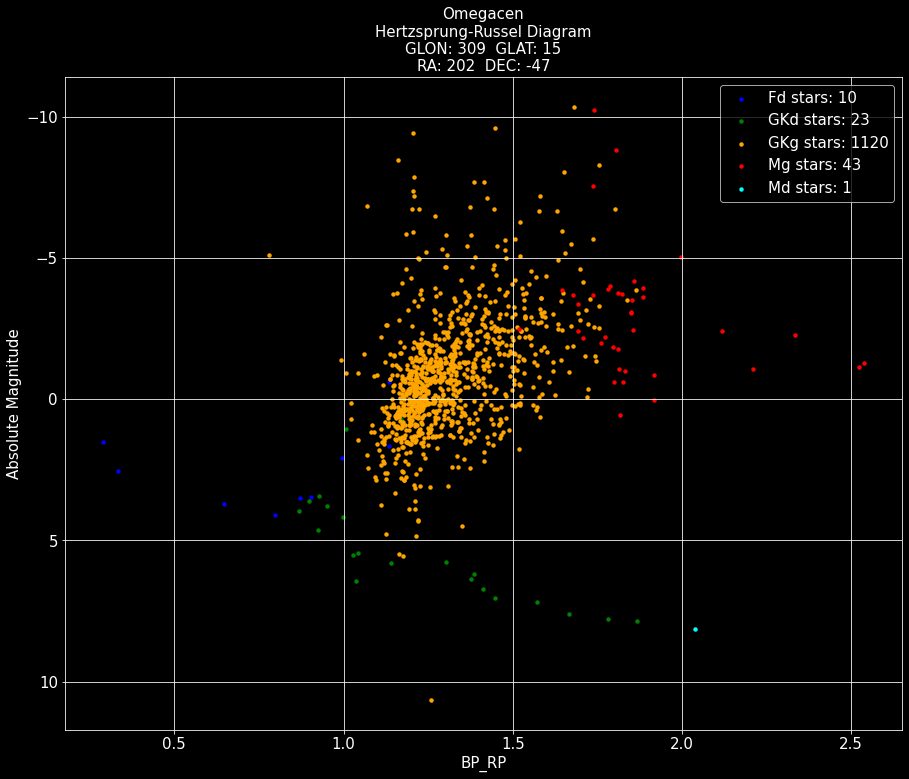

In [17]:

for field in field_list:
    f1 = df_Apogee[df_Apogee['FIELD'] == field]
    Plot002(f1)
    

In [18]:
DR16_fields = """ 

'000+00-C', '000+02', '000+02-O', '000+04', '000+04-O', '000+05-O', '000+08', '000+08-S', '000+12', '000+14', '000+16', '000+17', 
'000+30', '000+45', '000+60', '000+75', '000-02', '000-02-O', '000-04', '000-04-O', '000-08', '000-12', '000-17-C', '001+01', 
'001-01', '001-01-O', '001-04-O', '001-05-O', '002+00', '002+00-C', '002+02-O', '002+04', '002+06', '002-02-O', '002-03-O', 
'002-04', '002-05-O', '002-06-O', '003+02', '003+02-O', '003+03-O', '003+05', '003-02-O', '003-03-C', '003-03-O', '003-05', 
'003-05-O', '004+00', '004+02', '004+02-O', '004+04', '004+05-O', '004-02', '004-02-O', '004-04', '005+00', '005+02-O', '005+03', 
'005+03-O', '005+04', '005+05-O', '005+08', '005-02', '005-03', '005-03-O', '006+00', '006+02', '006+04-O', '006+06', '006-02', 
'007+02-O', '007+07', '008+00', '008+02', '008-02', '009+09', '010+00', '010+02', '010+12', '010+60', '010-02', '010-07-C', 
'010-12', '011+47_btx', '011+79_MGA', '012+00', '012+02', '012-02', '013+00', '014+00', '014+02', '014+89_MGA', '014-02', 
'015+02', '015+12', '015+30', '015-12', '015-14', '016+00', '016+02', '016+77_MGA', '016-02', '018+00', '018+02', '018-02', 
'020+00', '020+02', '020+04', '020+06', '020+12', '020+14', '020+60', '020-02', '020-06', '020-12', '020-14', '021+79_MGA',
 '022+00', '022+02', '022+82_MGA', '022-02', '023+78_MGA', '023+88_MGA', '024+00', '024+03', '024-03', '025+06', '025+10', 
 '025+12', '025+14', '025-06', '025-10', '025-12', '025-14', '027+00', '027+04', '027-04', '029+77_MGA', '029+88_MGA', '029-12-O', 
 '030+00', '030+04', '030+08', '030+12', '030+30', '030+60', '030+75', '030+79_MGA', '030-04', '030-08', '030-12', '032+81_MGA', 
 '033+00', '034+00', '034+06', '034+12', '034-06', '034-12', '037+79_MGA', '037+85_MGA', '038+00', '038+04', '038+48_MGA', '038-04',
 '039+45_MGA', '039+46_MGA', '040+36_MGA', '040+43_MGA', '040+45', '040+60', '040+88_MGA', '041+47_MGA', '041+48_MGA', '041+50_MGA',
 '041+53_MGA', '041+78_btx', '041+81_MGA', '041-52-O', '042+41_MGA', '042+43_MGA', '042+45_MGA', '042+87_MGA', '042-56-O', 
 '043+44_MGA', '043+46_MGA', '043+49_btx', '043-49-O', '044+42_MGA', '044+47_MGA', '044+49_MGA', '044+51_MGA', '044+54_MGA', 
 '044+59_MGA', '045+00', '045+06', '045+12', '045+30', '045+42_MGA', '045+56_MGA', '045+89_MGA', '045-06', '045-12', '045-54-O', 
 '046+34_MGA', '046+45_MGA', '046+47_MGA', '046+48', '046-47-O', '046-58-O', '047+50_MGA', '047+52_MGA', '047-25_MGA', '047-51-O', 
 '048+44_MGA', '048+55_MGA', '048+57_MGA', '048+88_MGA', '048-27_MGA', '048-48-O', '049+00', '049+06', '049+12', '049+46_MGA', 
 '049+47_MGA', '049+60_MGA', '049+62', '049+88_MGA', '049-06', '049-12', '049-52-O', '049-55-O', '050+31_MGA', '050+48_MGA', 
 '050+60', '050+63_MGA', '050-29_MGA', '051+60_btx', '051-50-O', '052+44_MGA', '052+87_MGA', '052-33_MGA', '053+00', '053+04', 
 '053+33_MGA', '053+46_MGA', '053+58_MGA', '053+88_MGA', '053-04', '054+87_MGA', '054-35_MGA', '055+33_MGA', '055+36_MGA', 
 '055+63_MGA', '055-53-O', '056+88_MGA', '056-50-O', '057+35_MGA', '058+37_MGA', '058+57', '059+36_MGA', '059-24_MGA', '059-48-O', 
 '060+00', '060+04', '060+08', '060+12', '060+30', '060+38_MGA', '060+56', '060+60', '060+75', '060+78_MGA', '060-04', '060-08',
 '060-12', '060-30', '060-45', '060-75', '061-25_MGA', '062+39_MGA', '062+43_MGA', '062+44_MGA', '062+52_MGA', '062+62', 
 '062+88_MGA', '063+41_MGA', '063+43_MGA', '063+44_MGA', '063+47_MGA', '063+55_btx', '064+00', '064+06', '064+12', '064+42_MGA', 
 '064+44_MGA', '064-06', '064-12', '065+00', '065+48_MGA', '065-29_MGA', '066+42_MGA', '066+47_MGA', '067+43_MGA', '067+46_MGA', 
 '068+00', '068+04', '068+51_MGA', '068+55_MGA', '068-04', '069+42_MGA', '069+45_MGA', '069+49_MGA', '069+57_MGA', '069+83_MGA', 
 '070+53_MGA', '070+54', '070+60', '070+69_MGA', '070+80_MGA', '071+43_MGA', '071+48_MGA', '071+60_MGA', '071+62_btx',
 '072+47_MGA', '072+51_MGA', '072+55_MGA', '072+76_MGA', '073+53_MGA', '073+72_MGA', '074+45_MGA', '074+49_MGA', '074+57_MGA', 
 '074+66_MGA', '075+00', '075+12', '075+30', '075+35', '075+44_MGA', '075+83_MGA', '075-06', '075-12', '075-30', '075-35_MGA',
 '075-45', '076+50_MGA', '076+88_MGA', '077+45_MGA', '077+69_MGA', '077+89_MGA', '078+52_MGA', '078+57_MGA', '078+76_MGA',
 '079+00', '079-06', '079-12', '080+45', '080+59_MGA', '080+60', '080+66_MGA', '080-45', '081+34_MGA', '082+35', '082+57_MGA', 
 '083+00', '083+04', '083+73_MGA', '083-04', '084+62_MGA', '085+33_MGA', '085+35_MGA', '085+59_MGA', '086+34_MGA', '086+47_MGA',
 '086+57_MGA', '086+66_MGA', '086+77', '088+34_MGA', '088+36', '088+55_MGA', '088+64_MGA', '089+70', '090+00', '090+04', '090+08', 
 '090+12', '090+30', '090+34_MGA', '090+49_MGA', '090+59_MGA', '090+60', '090+67_MGA', '090+75', '090-04', '090-08', '090-12', 
 '090-30', '090-45', '090-75', '091+56_MGA', '091-59_MGA', '092+65_MGA', '092+72_MGA', '093+36_MGA', '094+00', '094+06', '094+12', 
 '094+58_MGA', '094+61_MGA', '094-06', '094-12', '098+00', '098+04', '098+60_MGA', '098-04', '099+56_btx', 
 


 '100+00', '100+06', 
 '100+12', '100+60', '100-06', '100-12', '100-60', '101+04', '101-04', '101-24_btx', '102+61_MGA', '103+81_MGA', '104+77_btx', 
 '105+00', '105+06', '105+12', '105+30', '105-06', '105-12', '105-30', '105-45', '106+63_MGA', '109+00', '109+04', '109+08', 
 '109+12', '109+68_MGA', '109-04', '109-08', '109-12', '110+60', '110-60', '110-62_MGA', '111+70_MGA', '113+00', '113+04', 
 '113-04', '115+69_MGA', '115+71_MGA', '116+00', '116+04', '116-04', '116-63_MGA', '117+01', '120+00', '120+04', '120+06', 
 '120+08', '120+12', '120+18', '120+30', '120+45', '120+60', '120+67_btx', '120+75', '120-04', '120-06', '120-08', '120-08-RV', 
 '120-12', '120-24_btx', '120-30', '120-45', '120-60', '120-61-O', '120-75', '121+74_MGA', '123-53-O', '124+00', '124+04', '124-04', 
 '125+12', '125-12', '126-24_btx', '126-55-O', '126-59-O', '128+00', '128+04', '128+71_MGA', '128-04', '130+60', '130-60', '131+00', 
 '131+04', '131-04', '133-55-O', '134-51-O', '135+00', '135+06', '135+12', '135+30', '135-03', '135-06', '135-12', '135-30', 
 '135-45', '136+71_MGA', '137+70_MGA', '138+64_MGA', '139+00', '139+04', '139+27_btx', '139+61_MGA', '139-04', '140+06', '140+12',
 '140+24_btx', '140+60', '140-06', '140-12', '140-18_btx', '140-55-O', '140-60', '141+72_MGA', '142+35_btx', '143+00', '143+04', 
 '143+60_MGA', '143+76_MGA', '143-04', '143-47_MGA', '144+70_MGA', '145+62_MGA', '146+00', '146+04', '146+08', '146+12', 
 '146+18_btx', '146+24_btx', '146+26_btx', '146+36_btx', '146-04', '146-08', '146-12', '146-18_btx', '146-46_MGA', '147+60_MGA', 
 '147+64_MGA', '147-46_MGA', '149+59_MGA', '149+62_MGA', '149+72_MGA', '150+00', '150+04', '150+08', '150+16', '150+30',
 '150+60', '150+65_MGA', '150+75', '150-04', '150-08', '150-08-RV', '150-16', '150-30', '150-45', '150-60', '151+60_MGA',
 '151+70_MGA', '151+79_MGA', '151-45_MGA', '152+34_btx', '152+63_MGA', '154+00', '154+04', '154+59_MGA', '154+62_MGA', '154-04', 
 '155+65_MGA', '155-27_btx', '157+28_btx', '157+60_MGA', '158+00', '158+04', '158+12', '158+18', '158+63_MGA', '158-04', '158-12',
 '159+26_btx', '159+39_MGA', '159+58_MGA', '160+06', '160+12', '160+18_btx', '160+24_btx', '160+45', '160+56_MGA', '160+60', 
 '160+61_MGA', '160-06', '160-12', '160-18_btx', '160-24_btx', '160-45', '160-60', '161+00', '161+04', '161+34_MGA', '161-04', 
 '162+34_btx', '162+40_MGA', '162+60_MGA', '162+64_MGA', '163+36_MGA', '163+38_MGA', '163+78_MGA', '164+32_MGA', '164+34_MGA', 
 '165+00', '165+04', '165+08', '165+18', '165+30', '165+33_MGA', '165+38_MGA', '165+61_MGA', '165+62_MGA', '165-04', '165-08',
 '165-30', '165-45', '167+31_MGA', '167+34_MGA', '167+39_MGA', '168+30_MGA', '168+31_MGA', '168+46_MGA', '168+55_MGA', '168+62_MGA',
 '168+63_MGA', '169+00', '169+04', '169+08', '169+12', '169+18_btx', '169+24_btx', '169+33_MGA', '169+35_MGA', '169+53_MGA', 
 '169+61_MGA', '169-04', '169-08', '169-12', '169-18_btx', '169-24_btx', '170+31_MGA', '170+34_btx', '170+60', '170-60',
 '171+29_MGA', '171+48_MGA', '171-52_MGA', '172+27_MGA', '172+32_MGA', '172+54_MGA', '172+58_btx', '172+63_MGA', '172-52_MGA', 
 '173+00', '173+04', '173+12', '173+18', '173+30_MGA', '173+52_MGA', '173-04', '173-12', '173-51_MGA', '174+28_MGA', '174+33_MGA', 
 '174+35_MGA', '174+49_MGA', '174-51_MGA', '175+26_MGA', '175+31_MGA', '175+43_MGA', '175+58_MGA', '175+65_btx', '175-27-O',
 '176+00', '176+04', '176+27_MGA', '176+29_MGA', '176-04', '176-27-O', '176-49_MGA', '177+24_MGA', '177+32', '177+49_MGA',
 '177+51_MGA', '177-49_MGA', '178+24_MGA', '178+26_MGA', '178+28_MGA', '178+30_MGA', '178+36_btx', '178+42_MGA', '178+44_MGA', 
 '178-48_MGA', '179+57_MGA', '179-25-O', '180+00', '180+04', '180+08', '180+12', '180+18', '180+19', '180+29_MGA', '180+30', 
 '180+31_MGA', '180+33_MGA', '180+60', '180+75', '180-04', '180-08', '180-08-RV', '180-12', '180-30', '180-45', '180-60', '180-75',
 '181+25_MGA', '181+27_MGA', '181+32_btx', '181+42_MGA', '181-46_MGA', '182+25', '182+29_MGA', '182+30_MGA', '182-45_MGA', 
 '183-44_MGA', '184+00', '184+04', '184+30_MGA', '184+31', '184-04', '184-43_MGA', '185+27_MGA', '185+57_MGA', '185-42_MGA', 
 '186+30', '186+31_btx', '186+42', '186+48', '187+24_MGA', '187+26_MGA', '187+28_MGA', '187+48_MGA', '187-40_MGA', '187-41_MGA',
 '188+00', '188+04', '188+12', '188+18', '188+58_MGA', '188-04', '188-12', '189+25_MGA', '189+27_MGA', '189+29', '189+47_MGA', 
 '190+44_MGA', '190+45_MGA', '190+60', '190-50_MGA', '190-60', '191+00', '191+04', '191+08', '191+12', '191+18_btx', '191+22_MGA',
 '191+24_MGA', '191+26_MGA', '191+28_MGA', '191+44_MGA', '191+52_MGA', '191-04', '191-08', '191-12', '191-18_btx', '191-24_btx',
 '192-47_MGA', '192-48_MGA', '193+23_MGA', '193+25_MGA', '193+27_MGA', '193+29_MGA', '194+24_MGA', '194+26_MGA', '194+51_MGA', 
 '194-44_MGA', '195+00', '195+04', '195+08', '195+18', '195+28_MGA', '195+30', '195+30_MGA', '195+32_MGA', '195-04', '195-08',
 '195-30', '195-42_MGA', '196+25_MGA', '196+27_MGA', '196+37_MGA', '197+29_MGA', '197+31_MGA', '197-39_MGA', '198+08', '198+21_MGA',
 '198+24_MGA', '198+26_MGA', '198+33_MGA', '198+36_MGA', '198+38_MGA', '198+41_MGA', '199+00', '199+04', '199+28', '199+30_MGA',
 '199+43_MGA', '199-04', 
 
 '200+22_MGA', '200+25_MGA', '200+32_MGA', '200+34_MGA', '200+45', '200+60', '200-45', '200-60',
 '201+26_btx', '201+27_MGA', '201+29', '201+30_btx', '201+37_MGA', '202+21_MGA', '202+23_MGA', '202+31_MGA', '202+33_MGA', 
 '203+00', '203+04', '203+12', '203+18', '203+21', '203+26_MGA', '203+28_MGA', '203+30_MGA', '203-04', '203-12', '204+22',
 '204+24_MGA', '206+00', '206+04', '206+21', '206+29_MGA', '206+38_MGA', '206-04', '207+27_btx', '209+73_btx', '210+00', '210+04', 
 '210+08', '210+16', '210+30', '210+60', '210+75', '210-04', '210-08', '210-16', '212+38_MGA', '214+00', '214+04', '214+08', 
 '214+12', '214+18_btx', '214+24_btx', '214-04', '214-08', '214-12', '216+53_btx', '217+49_MGA', '218+00', '218+04', '218-04',
 '219+65_MGA', '219+68_MGA', '220+60', '221+04', '221+84', '221-04', '222+70_MGA', '222+71_MGA', '223+26_MGA', '223+27_MGA',
 '223+55', '225+00', '225+04', '225+30', '225-04', '225-12', '226+31_MGA', '228+60', '228-49', '229+04', '229-04', '230+32_MGA',
 '230+60', '232+30_btx', '232+38_MGA', '234+44_MGA', '235+00', '235+06', '235+12', '235-06', '235-12', '237+44_MGA', '237+48_MGA',
 '240+00', '240+04', '240+12', '240+18', '240+30', '240+45', '240+60', '240+75', '240-04', '240-12', '241+52_MGA', '246+77_btx',
 '250+60', '251+00', '253+51', '253+75', '255+00', '259+00', '259+57-O', '260+40', '260+55', '260+60', '261+48', '263-03', '264+20', 
 '266+44', '266+56-O', '266-06', '269-37-O_TESS', '270+00', '270+12', '270+60', '270+75', '270-12', '271-19-O_TESS', '272+58',
 '272-40-O_TESS', '273-20-O_TESS', '273-41-O_TESS', '277+76', '277-18-O_TESS', '277-20-O_TESS', '277-35-O', '278+00', '278-09',
 '278-21-O_TESS', '278-41-O_TESS', '279+66', '279-19-O_TESS', '279-31-O', '279-34-O', '279-40-O_TESS', '280+45', '280+49', 
 '280+60', '280-20-O_TESS', '280-27', '280-33-O', '281+00', '281+06', '281+12', '281-06', '281-35-O', '282-21-O_TESS', '282-34-O', 
 '283-01-C', '283-19-O_TESS', '284-20-O_TESS', '284-24-O_TESS', '284-26-O_TESS', '284-28-O_TESS', '284-30-O_TESS', '284-39',
 '284-40-O_TESS', '285+00', '285-22-O_TESS', '285-33-O_TESS', '286+44', '286-29-O_TESS', '287-23-O_TESS', '288-26-O_TESS',
 '288-28-O_TESS', '288-29-O_TESS', '288-31-O_TESS', '289-33-O_TESS', '290+60', '290-01-C', '290-30-O_TESS', '291-00-C', '292-26', 
 '296+00', '296+06', '296+12', '296-06', '296-12', '298-25', 
 
 '300+00', '300+04', '300+12', '300+60', '300+75', '300+75-S', 
 '300-04', '300-12', '300-23', '305-00-C', '30Dor', '310+60', '311+00', '311+06', '311+12', '311-06', '311-12', '315-02-O',
 '317+12', '320+45', '320+60', '325+76', '326+00', '326+06', '326+12', '326-06', '326-12', '330+12', '330+60', '330+75', '330-12', 
 '335+06', '335+12', '335+61_btx', '335-12', '340+00', '340+06', '340+10', '340+12', '340+14', '340+60', '340-06', '340-10', 
 '340-12', '340-14', '345+00', '345+02', '345+14', '345-02', '345-12', '347+00', '347+20-O', '348+17-O', '349+22-O', '350+00', 
 '350+04', '350+12', '350+18-O', '350+19-O', '350+20-O', '350+23-O', '350+60', '350-04', '350-12', '351+17-O', '351+18-O', 
 '351+21-O', '351+24-O', '351-02-O', '352+22-O', '353+17-O', '353+24-O', '354+19-O', '354-03-O', '355+00', '355+02', '355+04',
 '355+08', '355+22-O', '355+23-O', '355-02', '355-08', '356+00-C', '356+12-O', '356-03-O', '356-04-O', '356-06-O', '357+02-C', 
 '357+02-O', '357+03-O', '357+05', '357-03-O', '357-04-O', '358+00', '358+00-C', '358+02-O', '358+04', '358+06', '358-03-O',
 '358-04', '358-05-O', '359+01', '359+01-O', '359+03-O', '359+04-O', '359-02-O', '359-17-C', '47TUC', '71-56-O', 
 
 'ALPHAPER','ANDR1', 'ANDR2', 'ANDR3', 
 
 'BAADEWIN_001-04', 'BOOTES1', 'BRAVAFREE_000-05', 
 

 
 Be Stars
Be stars that are observable from the Northern hemisphere 
and too bright for the 2.5m are observed in this program.
These targets have field of 'Bestars'.
 
 'Bestars', 
 

 'CARINA',
 'COROT1', 'COROT2', 'COROTA', 'COROTA2', 'COROTA2-RV', 'COROTA3', 'COROTC', 
 
 'CVZ_FILL01_btx', 'CVZ_FILL02_btx', 'CVZ_FILL03_btx', 'CVZ_OB01_btx', 'CVZ_OB02_btx',
 'CVZ_OB03_btx', 'CVZ_OB04_btx', 'CVZ_OB05_btx', 'CVZ_OB06_btx', 'CVZ_OB07_btx', 'CVZ_OB08_btx', 'CVZ_OB09_btx', 'CVZ_OB10_btx',
 'CVZ_OB11_btx', 'CVZ_OB12_btx', 'CVZ_OB13_btx', 'CVZ_OB14_btx', 'CVZ_OB15_btx', 'CVZ_OB16_btx', 'CVZ_OB17_btx', 'CVZ_OB18_btx', 
 'CVZ_OB19_btx', 'CVZ_OB20_btx', 'CVZ_OB21_btx', 
 
 'DRACO', 
 
 'GALCEN', 'GD1-1', 'GD1-2', 'GD1-3', 'GD1-4', 'GD1-5', 
 
 'HD46375',
 
 'IC342_MGA', 'IC348', 'IC348_RV', 
 
 'K01_082+17', 'K02_080+18', 'K03_077+20', 'K04_083+13', 'K05_080+14', 'K06_078+16',
 'K07_075+17', 'K08_073+19', 'K09_081+11', 'K10_079+12', 'K11_076+13', 'K12_074+15', 'K13_071+16', 'K14_080+08', 'K15_077+10',
 'K16_075+11', 'K17_072+13', 'K18_070+14', 'K19_076+07', 'K20_073+09', 'K21_071+10', 'K2_C2_352+12_btx', 'K2_C4_168-21',
 'K2_C4_172-20', 'K2_C4_177-21', 'K2_C7_009-18', 'K2_C7_010-10', 

'LAMBDAORI-A', 'LAMBDAORI-B', 'LAMBDAORI-C', 

'LMC1', 'LMC10',
 'LMC11', 'LMC12', 'LMC13', 'LMC14', 'LMC16', 'LMC17', 'LMC2', 'LMC3', 'LMC4', 'LMC5', 'LMC6', 'LMC7', 'LMC8', 'LMC9', 
 
 'M10', 'M107', 'M12-N', 'M12-S', 'M13', 'M15', 'M2', 'M3', 'M3-RV', 'M33', 'M35N2158', 'M4', 'M5', 'M53', 'M54SGRC-2', 'M54SGRC1',
 'M55', 'M5PAL5', 'M67', 'M67-RV', 'M68', 'M71', 'M79', 'M92', 
 


M dwarf
This program targets previously identified M Dwarf stars to establish 
an empirical metallicity scale and spectral atlas for M-dwarfs in the APOGEE spectral range.
These targets have field of 'Mdwarfs'.

 'Mdwarfs', 
 


 'N1333', 'N1851', 'N188', 'N188-RV', 'N2204', 'N2243',
 'N2243-S', 'N2264', 'N2420', 'N2808', 'N288', 'N3201', 'N3201RRL', 'N362', 'N4147', 'N5466', 'N5634SGR2', 'N6229', 'N6388',
 'N6397', 'N6441', 'N6752', 'N6791', 'N6819', 'N7789', 'NGP', 
 
 'ORIONA', 'ORIONA-B', 'ORIONA-C', 'ORIONA-D', 'ORIONA-E', 'ORIONB',
 'ORIONB-A', 'ORIONB-B', 'ORIONC', 'ORIOND', 'ORIONE', 'ORIONOB1AB-A', 'ORIONOB1AB-B', 'ORIONOB1AB-C', 'ORIONOB1AB-D',
 'ORIONOB1AB-E', 'ORIONOB1AB-F', 
 
 'ORPHAN-1', 'ORPHAN-2', 'ORPHAN-3', 'ORPHAN-4', 'ORPHAN-5', 
 
 'Omegacen', 
 
 'PAL1', 'PAL5-1', 'PAL5-2',
 
 'PLEIADES-E', 'PLEIADES-W', 'Pleiades', 
 


RCB
This program targets known hydrogen deficient carbon (HdC) and R Coronae Borealis (RCB) stars.
These targets have field of 'RCB'.

 'RCB', 


 
 'SA57-E', 'SA57-N', 'SA57-S', 'SA57-W', 
 
 'SCULPTOR', 'SEXTANS', 
 
  'SGRC-1',
 'SGRC-3', 'SGRC-4', ' 'SGRT-1', 'SGRT-2', 'SMC1', 'SMC2', 'SMC3', 'SMC4', 'SMC5',
 'SMC6', 'SMC7',  'Sgr_faint', 


 In APOGEE-1 four fields designed for the Sagittarius tidal tails:
'N5634SGR2', 'SGR1', 'SgrO2', 'SgrO3',

 In APOGEE-1 five fields designed for the core of Sagittarius dwarf galaxy:
'M54SGRC1', SGRC3', 'SGRCMA-04', 'SGRCMI+02', 'SGRCNW+02',
 
 'TAUL1495', 'TAUL1521', 'TAUL1527', 'TAUL1536', 'TRIAND-1', 'TRIAND-2', 'TRIAND-3',
 'TRIAND-4', 'TRIAND-5', 
 
 'URMINOR', 
 
 'VOD1', 'VOD2', 'VOD3', 
 
 'W3-4', 'W5', 'W5a', 
 


Calibration
This program targets several stars with known parameters drawn from a variety of sources, 
such as those with angular diameters, asteroseismic measurements, Gaia targets, and optical abundance measurements.
These targets have field of 'calibration'.

 'calibration', 
 


Cepheid
Cepheid stars that are observable from the Northern hemisphere and too bright 
for the 2.5m are observed in this program.
These targets have field of 'cepheid'.

 'cepheid', 
 

Hipparcos
This program obtains APOGEE spectra for stars with parallaxes in Hipparcos 
and complimentary high-resolution optical spectroscopy.
These targets have field of 'hip'.

 'hip', 
 

 

 Other Programs
Data also exists with the field tag of 'misc' and 'rv'.

 'misc', 


Moving Groups
This program targets known stars in nearby moving groups.
These targets have field of 'moving_group'.

 'moving_groups', 
 


 'rrlyr', 'rv'

"""

In [19]:
"""
RomanLopes_18a (CNTAC)
https://www.sdss.org/dr16/irspec/targets/special-programs/

PI: A. Roman-Lopes (Universidad de La Serena)
As part of SDSS-IV, the APOGEE-2 survey is leading a revolution in our understanding 
of the Milky Way. The Carina star-forming complexes (CSFCs) contain some of the 
most massive star-forming regions in the Galaxy. 
It is an ideal laboratory to test theories of the spatially segregated formation 
of stars and triggering mechanisms. 
This program takes advantage of the huge FOV and multiplexing of the 
APOGEE2-S spectrograph to confirm the massive nature of selected samples 
of hot star candidates in the Galactic plane, both in the vicinity 
and in the periphery of the regions forming massive stars that are found in the CSFCs. 
The project also uses the excellent spectral resolution provided by the 
APOGEE2-S instrument, using the high signal-to-noise radial velocity measurements 
to obtain spectroscopic information of about 1750 candidate massive stars, 
a task virtually impossible to be done by using single slit NIR spectrograph facilities.
"""
RomanLopes_18a = [
'283-01-C', '290-01-C', '291-00-C'
    ]


"""
TeskeVanSaders_17b (OCIS)
https://www.sdss.org/dr16/irspec/targets/special-programs/

PI: J. Teske (OCIS) and J. Van Saders (University of Hawaii)
We propose to collect APOGEE spectra of bright, cool dwarf stars monitored 
with the K2 ecliptic survey, including stars found via the K2 light curves 
to host planet candidates and M dwarf stars. 
These APOGEE data will be used to measure stellar parameters and chemical abundances
 for low-mass stars in the K2 campaign fields. 
 The science goals are 
 (1) estimating rotation-based ages, 
 (2) deriving the age-metallicity relation, and 
 (3) looking for correlations between exoplanet architectures and host-star compositions. 
 In particular, M dwarf spectra are of high value in the development of an 
 analysis method for extracting reliable, detailed abundances of Teff<4000 K stars.
"""
TeskeVanSaders_17b = [
'003-02-O', '029-12-O', '041-52-O', '042-56-O', '043-49-O', '045-54-O'
, '046-47-O', '046-58-O', '049-52-O', '051-50-O', '056-50-O', '059-48-O'
, '120-61-O', '123-53-O', '126-55-O', '126-59-O', '133-55-O', '140-55-O'
, '175-27-O', '176-27-O', '179-25-O', '351-02-O', '357+02-O']



"""
TeskeVanSaders_18a (OCIS)
https://www.sdss.org/dr16/irspec/targets/special-programs/

PI: J. Teske (OCIS), J. van Saders (University of Hawaii), 
and R. Beaton (Princeton/OCIS)
We propose to collect APOGEE-2S spectra of bright (7 <H <11 mag) stars 
that fall within the 450 deg2 of the Southern Ecliptic Pole. 
 NASA's Transiting Exoplanet Survey Satellite (TESS) 
 will have continuous coverage in this region of the sky. 
 These APOGEE data will be used to measure stellar parameters and chemical abundances. 
 When combined with the precise TESS photometric light curves, 
 these data enable investigations of open questions about exoplanets, 
 stellar astrophysics, and distance ladder calibration.
"""
TeskeVanSaders_18a = [
'269-37-O_TESS', '271-19-O_TESS', '272-40-O_TESS', '273-20-O_TESS'
, '273-41-O_TESS', '277-18-O_TESS', '277-20-O_TESS', '278-21-O_TESS'
, '278-41-O_TESS', '279-19-O_TESS', '279-40-O_TESS', '280-20-O_TESS'
, '282-21-O_TESS', '283-19-O_TESS', '284-20-O_TESS', '284-24-O_TESS'
, '284-26-O_TESS', '284-28-O_TESS', '284-30-O_TESS', '284-40-O_TESS'
, '285-22-O_TESS', '285-33-O_TESS', '286-29-O_TESS', '287-23-O_TESS'
, '288-26-O_TESS', '288-28-O_TESS', '288-29-O_TESS', '288-31-O_TESS'
, '289-33-O_TESS', '290-30-O_TESS', '315-02-O']



anc = [
'033+00', '065+00', '135-03', 'ANDR3', 'COROT1', 'COROT2', 'IC348_RV', 'M3-RV'
, 'M33', 'M67-RV', 'SA57-E', 'SA57-N', 'SA57-S', 'SA57-W', 'W3-4', 'W5', 'W5a']

apogee = [
'000+02', '000+04', '000+08', '000+12', '000+14', '000+16', '000+30', '000+45'
, '000+60', '000+75', '000-02', '001+01', '001-01', '002+00', '002+04', '002+06'
, '002-04', '003+05', '003-05', '004+00', '004+02', '004+04', '004-02', '004-04'
, '005+03', '005-03', '006+00', '006+02', '006+06', '006-02', '007+07', '008+00'
, '008+02', '008-02', '009+09', '010+02', '010+60', '010-02', '012+00', '012+02'
, '012-02', '014+00', '014+02', '014-02', '015+30', '016+00', '016+02', '016-02'
, '018+00', '018+02', '018-02', '020+00', '020+02', '020+60', '020-02', '022+00'
, '022+02', '022-02', '024+00', '024+03', '024-03', '027+00', '027+04', '027-04'
, '030+00', '030+04', '030+08', '030+12', '030+30', '030+60', '030+75', '030-04'
, '030-08', '030-12', '038+00', '038+04', '038-04', '040+45', '040+60', '045+00'
, '045+06', '045+12', '045+30', '045-06', '045-12', '046+48', '049+62', '050+60'
, '053+00', '053+04', '053-04', '058+57', '060+00', '060+04', '060+08', '060+12'
, '060+30', '060+56', '060+60', '060+75', '060-04', '060-08', '060-12', '060-45'
, '062+62', '068+00', '068+04', '068-04', '070+54', '070+60', '075+00', '075+12'
, '075+30', '075+35', '075-06', '075-12', '075-45', '080+45', '080+60', '082+35'
, '083+00', '083+04', '083-04', '086+77', '088+36', '089+70', '090+00', '090+04'
, '090+12', '090+30', '090+60', '090+75', '090-04', '090-08', '090-12', '090-45'
, '098+00', '098+04', '098-04', '100+60', '100-60', '101+04', '101-04', '105+00'
, '105+06', '105+12', '105+30', '105-06', '105-12', '105-45', '109+04', '109-04'
, '110+60', '113+00', '113+04', '113-04', '116+04', '116-04', '117+01', '120+00'
, '120+04', '120+08', '120+12', '120+30', '120+45', '120+60', '120+75', '120-04'
, '120-08', '120-12', '120-45', '124+04', '124-04', '128+00', '128+04', '128-04'
, '130+60', '131+04', '131-04', '135+00', '135+06', '135+12', '135+30', '135-06'
, '135-12', '135-45', '139+04', '139-04', '140+60', '143+00', '143+04', '143-04'
, '146+04', '146-04', '150+00', '150+04', '150+08', '150+16', '150+30', '150+60'
, '150+75', '150-04', '150-08', '150-16', '150-45', '154+04', '154-04', '158+00'
, '158+04', '158+12', '158+18', '158-04', '158-12', '160+45', '160+60', '161+04'
, '161-04', '165+00', '165+04', '165+08', '165+18', '165+30', '165-04', '165-08'
, '165-45', '169+00', '169+04', '169-04', '170+60', '173+00', '173+04', '173+12'
, '173+18', '173-04', '173-12', '176+00', '176+04', '176-04', '180+00', '180+04'
, '180+08', '180+12', '180+18', '180+19', '180+30', '180+60', '180+75', '180-04'
, '180-08', '180-12', '180-45', '182+25', '184+00', '184+04', '184-04', '186+42'
, '186+48', '188+00', '188+04', '188+12', '188+18', '188-04', '188-12', '190+60'
, '191+00', '191+04', '191-04', '195+00', '195+04', '195+08', '195+18', '195+30'
, '195-04', '195-08', '198+08', '199+04', '199-04', '200+45', '200+60', '203+00'
, '203+04', '203+12', '203+18', '203-04', '203-12', '206+04', '206-04', '210+00'
, '210+04', '210+16', '210+30', '210+60', '210+75', '210-04', '210-08', '210-16'
, '214+04', '214-04', '218+00', '218+04', '218-04', '220+60', '221+04', '221+84'
, '221-04', '223+55', '225+04', '225+30', '225-04', '228+60', '229+04', '229-04'
, '230+60', '235+00', '235+06', '235+12', '235-06', '235-12', '240+18', '240+30'
, '240+45', '240+60', '240+75', '250+60', '253+51', '253+75', '260+40', '260+55'
, '260+60', '261+48', '266+44', '270+60', '270+75', '272+58', '277+76', '279+66'
, '280+45', '280+49', '280+60', '286+44', '290+60', '300+60', '300+75', '310+60'
, '320+45', '320+60', '325+76', '330+60', '330+75', '340+60', '350+60', '357+05'
, '358+00', '358+04', '358+06', '359+01', 'ANDR1', 'ANDR2', 'BAADEWIN_001-04'
, 'BRAVAFREE_000-05', 'COROTA', 'COROTA2', 'COROTA3', 'COROTC', 'GALCEN', 'IC348'
, 'K01_082+17', 'K02_080+18', 'K03_077+20', 'K04_083+13', 'K05_080+14'
, 'K06_078+16', 'K07_075+17', 'K08_073+19', 'K09_081+11', 'K10_079+12'
, 'K11_076+13', 'K12_074+15', 'K13_071+16', 'K14_080+08', 'K15_077+10'
, 'K16_075+11', 'K17_072+13', 'K18_070+14', 'K19_076+07', 'K20_073+09'
, 'K21_071+10', 'M107', 'M13', 'M15', 'M2', 'M3', 'M35N2158', 'M53', 'M54SGRC1'
, 'M5PAL5', 'M67', 'M71', 'M92', 'N1333', 'N188', 'N2243', 'N5634SGR2', 'N6229'
, 'N6791', 'N6819', 'N7789', 'NGP', 'ORIONA', 'ORIONB', 'ORIONC', 'ORIOND'
, 'ORIONE', 'PAL1', 'Pleiades', 'SGR1', 'SGRC3', 'SGRCMA-04', 'SGRCMI+02'
, 'SGRCNW+02', 'SgrO2', 'SgrO3']

apogee_marvels = [
'030+00', '030+04', '030+08', '030-04', '030-08', '060+00', '060+04', '060+08'
, '060-04', '060-08', '090+00', '090+04', '090+08', '090-04', '090-08', '120+00'
, '120+04', '120+08', '120-04', '120-08', '150+00', '150+04', '150+08', '150-08'
, '165-04', '180-08', 'M15', 'M3', 'M53', 'N5466', 'PAL1', 'VOD2', 'VOD3']



####################################################################################################################

"""
Beaton_18a (OCIS)
https://www.sdss.org/dr16/irspec/targets/special-programs/

PI: R. Beaton (Princeton/OCIS)
This CIS External Program has collected single-phase APOGEE spectroscopy 
for the brightest and well-studied Cepheids in the LMC and SMC, 
which can be combined with literature multi-band optical to mid-infrared photometry, 
to study the dispersion of these stars against the mean Leavitt Law. 
Additional fainter Cepheids were also targeted.
"""
beaton_18a = [
'277-35-O', '279-31-O', '279-34-O', '280-33-O', '281-35-O', '282-34-O']



####################################################################################################################

"""
Borissova_17a (CNTAC)
https://www.sdss.org/dr16/irspec/targets/special-programs/

CPI: J. Borissova (Universidad de Valparaíso)
The relatively nearby star-forming complex G305 
is one of the most luminous H II regions in the Galaxy, 
and it contains several sites and epochs of star formation. 
This project combination of near-infrared photometry from 
“Vista Variables in Via Lactea” ESO Large Public Survey, 
SDSS-IV APOGEE-2 spectra, and Gaia DR2 photometry and astrometry 
to classify stars in this complex.

Please see Borissova et al. (2019).
"""
borissova_17a = ['305-00-C']


####################################################################################################################

"""
Bulge
https://www.sdss.org/dr16/irspec/targets/

All APOGEE-1 bulge stars were selected using a single color limit of 
(J−Ks)0 ≥0.5 mag. For APOGEE-1 targets, bulge fields were selected in 
the galactic region 357∘ ≤ l ≤ 22∘, |b|≤ 16∘, 
while for APOGEE-2 the bulge region corresponds to 340∘  ≤l≤ 20∘, |b| ≤ 25∘.
All APOGEE-1 bulge fields had one visit, with a faint magnitude limit of H=11 mag. 
Given that the Galactic bulge reaches much higher altitudes in the southern hemisphere, 
all APOGEE-2 bulge fields were observed as part of APOGEE-2S. 
These fields have a faint magnitude limit of either H=12.2 mag or H=12.8 mag. 
Fields designed to a H=12.2 mag depth were scheduled for three total visits 
following the standard magnitude visits relation. 
Due to an underestimation of the time that it would require to complete the 
bulge APOGEE-2S plan, cohorts in H=12.8 mag depth bulge fields are not always 
scheduled for the total number of visits required to reach
 a signal-to-noise of 100. In any case, a lower limit of signal-to-noise of ~80 is guaranteed 
 for all APOGEE-2S bulge fields given the number of visits assigned to each cohort. 
 All APOGEE-2 designs from bulge fields have the PROGRAMNAME “bulge”.
"""

bulge = [
'000+08', '000+08-S', '000+12', '000+17', '000-04', '000-08', '000-12', '002-04'
, '005+00', '005+04', '005+08', '005-02', '010+00', '010+12', '010-12', '013+00'
, '015+02', '015+12', '015-12', '015-14', '020+00', '020+04', '020+06', '025-10'
, '340+00', '340+10', '340+14', '345+00', '345+02', '345+14', '345-02', '345-12'
, '347+00', '350+00', '350+04', '350+12', '350-04', '350-12', '355+00', '355+02'
, '355+04', '355+08', '355-02', '355-08', '358-04']



####################################################################################################################

"""
Globular Clusters
https://www.sdss.org/dr16/irspec/targets/

Globular cluster stars from APOGEE were selected independently 
for each system using the following priority scheme:
1. Known members based on chemical abundances and stellar parameters 
   determined from prior spectroscopic information ( apogee2_target2 =2 and 10)
2. Candidates selected with radial velocities (apogee2_target2=10)
3. Candidates selected with proper motions (apogee2_target2=10)
4. Photometric candidates

Targeted Globular Clusters:

Survey ComponentCluster Names

APOGEE-1
NGC4147, M53, M3, NGC5466, NGC5634, M5, M107, M13, NGC6229, M92, NGC6715, M15, M2

APOGEE-2N
M12, M15, M71, M5

APOGEE-2S
47 Tucanae, M10, M12, M22, M4, M55, M68, M79, NGC1851, NGC2808, NGC288, 
NGC3201, NGC362, NGC6388, NGC6397, NGC6441, NGC6752, Omega Centauri

APOGEE-2 designs belonging to globular cluster fields have PROGRAMNAME 
tag value “cluster_gc”, “cluster_gc1”, “cluster_gc2”, or “cluster_gc3”.

Globular cluster candidates may not be flagged appropriately in DR16.
"""

cluster_gc = [
'47TUC', 'M12-N', 'M15', 'M5PAL5', 'M71', 'N1851', 'N288', 'N362', 'N6441'
, 'Omegacen', 'Sgr_faint']

cluster_gc1 = ['M4', 'M68', 'M79', 'N1851', 'N2808', 'N3201']

cluster_gc2 = ['M10', 'M12-S']


clusters_gc1 = ['N6388', 'N6752']

clusters_gc2 = ['M55']

clusters_gc3 = ['N6397']



####################################################################################################################

"""
Open Clusters
https://www.sdss.org/dr16/irspec/targets/

Open clusters from APOGEE were chosen to cover a wide range of 
age, metallicity, and galactocentric distance. 
Frinchaboy et al. 2013 describes the Open Cluster Chemical Abundance and Mapping survey (OCCAM) 
and includes a detailed discussion of the targeting algorithms. 
Donor et al. (2018) provides an update for the 
Open Cluster Chemical Abundance and Mapping survey (OCCAM), 
including revisions to the target selection using early releses from Gaia.

The sense of this targeting is similar to that for the Globular clusters, which is:
1. Known members based on chemical abundances and stellar parameters 
determined from prior spectroscopic information
2. Candidates selected with radial velocities
3. Candidates selected with proper motions
4. Photometric candidates

However, photometric candidates are selected such that stars have 
a common redenning value (see discussion in Frinchaboy et al. 2013). 
All targets selected in the open cluster program will have apogee2_target1=9 .

The complete list of Open Clusters targeted in APOGEE is presented below:

Targeted Open Clusters:

Survey Component

Cluster Names

APOGEE-1
Berkeley 29 (field 198+08), Pleiades, NGC188 NGC2158, M35, NGC2243, 
NGC2420, M67, NGC6791, NGC6819, NGC7789

APOGEE-2N
NGC188, NGC2243

APOGEE-2S
NGC2243, M67, NGC2204, NGC2243, NGC6253, NGC5999, NGC6583, NGC6603, Trumpler20, Collinder 261

All APOGEE-2 designs belonging to open cluster fields have PROGRAMNAME tag value “cluster_oc”.
"""

cluster_oc = ['M67', 'N188', 'N2204', 'N2243-S']



####################################################################################################################

"""
TESS N-CVZ
https://www.sdss.org/dr16/irspec/targets/


As part of the Bright Time Extension, 
a program was initiatied to study the Northern Continuous Viewing Zone for the TESS satellite. 

The fields are called "CVZ_*_btx" and have PROGRAMNAME "cvz_btx."

Targets were selected with a multi-tier priority scheme that prioritized 
rare targets over more common targets. 

All targets were selected from the TESS Input Catalog (TIC). 

The targeting is documented in APOGEE2_TARGET2 as follows:

- bit 27 APOGEE2_CVZ_AS4_OBAF: OBAF stars
- bit 28 APOGEE2_CVZ_AS4_GI: targets in 
  Guest Investigator programs such as planet hosts, 
  Astroseismic Target List, Subgiants, and Cool-dwarfs
- bit 29 APOGEE2_CVZ_AS4_CTL: Filler CTL star selected from the TESS Input Catalog
- bit 30 APOGEE2_CVZ_AS4_GIANT: Filler Giant selected in a reduced proper motion diagram

"""

cvz_btx = ['CVZ_FILL01_btx', 'CVZ_FILL02_btx', 'CVZ_FILL03_btx', 'CVZ_OB01_btx'
, 'CVZ_OB02_btx', 'CVZ_OB03_btx', 'CVZ_OB04_btx', 'CVZ_OB05_btx'
, 'CVZ_OB06_btx', 'CVZ_OB07_btx', 'CVZ_OB08_btx', 'CVZ_OB09_btx'
, 'CVZ_OB10_btx', 'CVZ_OB11_btx', 'CVZ_OB12_btx', 'CVZ_OB13_btx'
, 'CVZ_OB14_btx', 'CVZ_OB15_btx', 'CVZ_OB16_btx', 'CVZ_OB17_btx'
, 'CVZ_OB18_btx', 'CVZ_OB19_btx', 'CVZ_OB20_btx', 'CVZ_OB21_btx']



####################################################################################################################

"""
Disk
https://www.sdss.org/dr16/irspec/targets/

For APOGEE-1 targets, a single color limit of (J−Ks)0≥ 0.5 mag was applied in disk fields. 
For APOGEE-2, a dual-color limit was used, with a defined fraction of the targets 
having 0.5 ≤(J−Ks)0 ≤ 0.8 mag and the rest with (J−Ks)0 ≥ 0.8 mag. 
The intended fraction of targets in each color bin is recorded in the apogee2Design 
file for each plate design. For APOGEE-1 targets, disk fields were selected in the 
Galactic region 24∘ ≤ l ≤ 240°, |b| ≤16°, while for APOGEE-2 
the disk region corresponds to 20∘ ≤ l ≤ 340∘, |b| ≤25∘. 
APOGEE disk fields had depths of H=12.2, 12.8, and in some cases 13.8 mag.
In some APOGEE-2 disk cohorts, the bright limit was reduced to H=10 mag 
to increase the number of faint, and hopefully distant, disk targets. 
This reduced magnitude limit was applied for all the fields were we expected 
to fill both color bins with the reduced magnitude range; 
stars selected this way are flagged with APOGEE2_TARGET2 bit 23.

In the APOGEE-2N Bright Time Extension, a focused effort was made 
to target substructure in the outer disk. 

This occurred in two parts: (1) we explicitly targeted confirmed substructure members
 from previous work (APOGEE2_TARGET2 bit 7) and (2) we identified substructure candidates 
 using proper motion criteria to remove foreground stars (APOGEE2_TARGET2 bit 8). 
 These fields have PROGRAMNAME “odisk” and have “_btx” appended to the FIELD. 

 APOGEE-2 designs from disk fields that are not part of APOGEE-2N bright Time Extension 
 have PROGRAMNAME “disk”, “disk1”, or “disk2”. 
 
 In APOGEE-2, the "disk1" program is meant to mirror the APOGEE-1 disk footprint, 
 "disk2" are new fields, and "disk" are randomly placed fields.
"""

disk = ['020+14', '020-06', '020-12', '020-14', '025+10', '025+14', '025-14', '027+00'
, '100+00', '100+06', '100+12', '100-06', '100-12', '120+06', '120+12', '120-06'
, '120-12', '140+06', '140+12', '140-06', '140-12', '160+06', '160+12', '160-06'
, '160-12', '180+12', '180-12', '214-08', '240-12', '263-03', '264+20', '278-09'
, '296+06', '296-06', '298-25', '300-23', '311-12', '317+12', '326+12', '326-06'
, '326-12', '330-12', '335+12', '335-12', '340+12', '340-10', '340-12', '340-14']

disk1 = ['120+18', '125+12', '125-12', '225+00', '225-12', '240+00', '240+04', '240+12'
, '240-04', '240-12', '255+00', '270+00', '270+12', '270-12', '278+00', '285+00'
, '300+00', '300+04', '300+12', '300-04', '300-12', '330+12']

disk2 = ['020+06', '020+12', '025+06', '025+12', '025-06', '025-12', '034+00', '034+06'
, '034+12', '034-06', '034-12', '049+00', '049+06', '049+12', '049-06', '049-12'
, '060-04', '064+00', '064+06', '064+12', '064-06', '064-12', '079+00', '079-06'
, '079-12', '094+00', '094+06', '094+12', '094-06', '094-12', '109+00', '109+08'
, '109+12', '109-08', '109-12', '116+00', '124+00', '131+00', '139+00', '146+00'
, '146+08', '146+12', '146-08', '146-12', '154+00', '161+00', '169+00', '169+08'
, '169+12', '169-08', '169-12', '176+00', '184+00', '191+00', '191+08', '191+12'
, '191-08', '191-12', '199+00', '206+00', '214+00', '214+08', '214+12', '214-08'
, '214-12', '251+00', '259+00', '266-06', '281+00', '281+06', '281+12', '281-06'
, '296+00', '296+12', '296-06', '296-12', '311+00', '311+06', '311+12', '311-06'
, '326+00', '326+06', '326-06', '326-12', '335+06', '340+06', '340-06']



####################################################################################################################

"""
Geisler_18a (CNTAC)
https://www.sdss.org/dr16/irspec/targets/special-programs/

PI: D. Geisler (Universidad de Concepcion)
The Galactic Bulge hosts a large number of globular clusters (GCs). 
These objects are powerful cosmological probes to investigate the formation and 
chemical evolution of this key Galactic component. 
Unfortunately, until recently, we have not been able to unleash the full power 
of the bulge GCs to help unravel its mysteries due to their high extinction, 
which strongly limits optical observations. 
However, we minimize extinction effects are minimized by observing in the near IR, 
allowing us to exploit the bulge GC's extraordinary archaeological attributes fully. 
CAPOS (bulge Cluster APOgee Survey) will observe a number of the GCs 
that are left off the Survey. 
The goal of CAPOS is to observe ALL of the missing GCs, 
amounting to fully 80% of the total sample, to obtain a complete sample, 
which will become part of SDSS-IV. 
These observations will allow us to perform a definitive study of the Bulge GC system, 
as well as investigate many salient details concerning chemistry, multiple populations, 
orbits, etc.
"""
geisler_18a = ['003-03-C', '010-07-C', '357+02-C']



####################################################################################################################

"""
Halo
https://www.sdss.org/dr16/irspec/targets/

For APOGEE-1 targets, a single limit of (J−Ks)0≥0.3 mag was used for halo fields; 
the bluer color limit was enacted to boost counts because halo-fields have far fewer target candidates). 
This color range was maintained for APOGEE=2 halo fields. For APOGEE-1 targets, 
halo fields were selected in the galactic region |b|>16∘, 
while for APOGEE-2N and APOGEE-2S the halo region corresponds to |b|≥25∘. 
APOGEE halo fields had depths of H= 12.2, 12.8, or 13.8 mag, 
to increase the number of distant stars and, thus, halo membership fractions.
Often for the APOGEE-2 halo program, we use Washington M, Washington T2, 
and DDO51 (Wash+D, hereafter) photometry to classify stars as dwarfs or giants 
prior to their selection as spectroscopic targets, 
in addition to the reddening and magnitude limits applied for each field 
(e.g., Majewski et al. 2000). 
This pre-selection is employed in these particular fields to increase the selection efficiency of giant stars, 
which have an intrinsically higher dwarf fraction for APOGEE's magnitude range 
than for fields in the Galactic plane. 
Stars targeted as photometrically classified giants have bit 7 set in 
APOGEE_TARGET1 or APOGEE2_TARGET1 and are prioritized over photometrically classified dwarfs 
which have bit 8 set in APOGEE_TARGET1 or APOGEE2_TARGET1. 

All APOGEE-2 designs from halo fields that are not part of APOGEE-2N bright Time Extension have PROGRAMNAME “halo.”

In APOGEE-2S besides the stars selected using the standard criteria, 
we explicitly added high priority targets based on spectroscopic and proper motion information, 
to increase our halo member fraction. 

Four of these fields are included in DR16 and correspond to 313+29, 294+40, 256+26, and 255-27.

In the APOGEE-2N Bright Time Extension, a focused effort was made to target more distant stars. 
This occurred in two parts:
 (1) we explicitly targeted confirmed K-giants from SEGUE (APOGEE2_TARGET2 bit 20) and 
 (2) we identified halo candidates using proper motion criteria that removed 
 foreground stars (APOGEE2_TARGET2 bit 21). 
 
 Designs from these halo fields will have PROGRAMNAME “halo_btx” and “_btx” is appended to FIELD.
"""

halo = ['000+60', '030+30', '030+60', '040+45', '060+60', '060+75', '060-30', '060-75'
, '075-30', '080+45', '080-45', '090+60', '090-30', '090-75', '100-60', '105-30'
, '110-60', '120+30', '120+45', '120+60', '120+75', '120-30', '120-60', '120-75'
, '130-60', '135-30', '140-60', '150+30', '150-30', '150-60', '160+45', '160-45'
, '160-60', '165-30', '170-60', '180+60', '180+75', '180-30', '180-60', '180-75'
, '190-60', '195-30', '200+45', '200-45', '200-60', '210+60', '228-49', '240+60'
, '240+75', '270+60', '280+45', '280-27', '284-39', '292-26', '300+60', '300+75'
, '300+75-S', '30Dor', '320+45', '330+60']

halo_btx = ['011+47_btx', '041+78_btx', '043+49_btx', '051+60_btx', '063+55_btx'
, '071+62_btx', '099+56_btx', '104+77_btx', '120+67_btx', '172+58_btx'
, '175+65_btx', '209+73_btx', '216+53_btx', '246+77_btx', '335+61_btx']



####################################################################################################################

"""
Dwarf Spheroidal Satellites
https://www.sdss.org/dr16/irspec/targets/

 APOGEE-2 has targeted a number of dwarf Spheroidal galaxies (dSph, hereafter); more specifically, 

 APOGEE-2N targeted 
 Draco, Ursa Minor, Boötes I and 
 
 APOGEE-2S targeted 
 Sculptor, Carina, Sextans, and Fornax. 
 
 The observations for these programs are not complete in DR16.
All APOGEE dSph fields are scheduled for at least 24 total visits. 

In APOGEE-2N the dSph fields contain four 6-visit designs, and each field includes four short cohorts, 
two medium cohorts, and a single long cohort. 

In the Bright Time Extension of APOGEE-2N, each dSph field was allocated additional visits. 

In APOGEE-2S the dSph fields are observed using 24 visits with a single design. 

Because APOGEE-2S field-of-view is considerably smaller than its northern counterpart, 
the cohort scheme was not necessary.

The dSph members have targeting bit 20 set in APOGEE2_TARGET1 and 
dSph photometric candidates have targeting bit 21 set in APOGEE2_TARGET1. 

All designs belonging to dSph fields have PROGRAMNAME tag value “halo_dsph”.
"""

halo_dsph = ['BOOTES1', 'CARINA', 'DRACO', 'SCULPTOR', 'SEXTANS', 'URMINOR']



####################################################################################################################

"""
Stellar Streams
https://www.sdss.org/dr16/irspec/targets/

APOGEE has targeted a variety of stellar streams 
that either represents the remnants of galactic mergers, t
idally disrupted clusters or have a yet unknown nature.

In APOGEE-2N, we targeted five streams: 
1. the Triangulum-Andromeda (TriAnd) structure, 
2. the tidal tails of the globular cluster Palomar5, 
3. the Orphan stream, 
4. the GD-1 stream, and the 
5. Sagittarius tidal tail.

To observe the TriAnd structure, we selected the 5 fields (TRIAND-1 to TRIAND-5) 
where the standard halo selection without Wash+D photometry selected most TriAnd candidates 
from Sheffield et al. (2014) and Chou et al. (2011). 

Additional targeting in the area spanned by TriAnd occurred in the 
Bright Time Extension program in the outer disk.

For the Palomar 5, Orphan, GD1, and Sagittarius streams, 
we used a variety of catalogs to select likely members, 
using the following priority ranking:

1. Stars classified as giants using Wash+D photometry, 
and photometric candidates using the location in (J−Ks)0 versus H CMD.

2. (J−Ks)0 versus H photometric candidates without Wash+D dwarf/giant classification

3. Wash+D-classified giants with lower membership probability based on the 
(J−Ks)0 versus H CMD location.

4. Stars without Wash+D dwarf/giant classification and with lower membership probability 
based in the (J−Ks)0 versus H CMD location.

All stream photometric candidates have targeting bit 19 set in APOGEE2_TARGET1, 
and the corresponding Wash+D flag according to their classification. 

All designs belonging to stream fields have PROGRAMNAME tag value “halo_stream”.
"""

halo_stream = ['GD1-1', 'GD1-2', 'GD1-3', 'GD1-4', 'GD1-5', 'ORPHAN-1', 'ORPHAN-2', 'ORPHAN-3'
, 'ORPHAN-4', 'ORPHAN-5', 'PAL5-1', 'PAL5-2', 'SGRT-1', 'TRIAND-1', 'TRIAND-2'
, 'TRIAND-3', 'TRIAND-4', 'TRIAND-5']



####################################################################################################################

"""
K2
https://www.sdss.org/dr16/irspec/targets/
 
APOGEE-2 is targeting several thousand giant stars in select K2 Mission Campaign fields, 
largely from the K2 Galactic Archaeology Program’s (GAP) sample of asteroseismic targets. 

The details of the GAP sample are given in J. Zinn et al. (in prep.). 

Several considerations were made in the final target selection:
1. stars known to host planets
2. confirmed oscillators in the K2 GAP sample
3. red giants targeted by GAP, but not observed by GALAH
4. red giants targeted by GAP, but observed by GALAH
5. unbiased M dwarf sample

Any remaining fibers followed the criteria for the main red star sample. 

The stars from this science program have targeting bit 6 set in APOGEE2_TARGET3. 

All APOGEE-2 designs belonging to K2 fields have PROGRAMNAME tag value “k2” or "k2_btx".
"""

k2 = ['K2_C4_168-21', 'K2_C4_172-20', 'K2_C4_177-21', 'K2_C7_009-18'
, 'K2_C7_010-10']

k2_btx = ['K2_C2_352+12_btx']


####################################################################################################################

"""
Spectroscopic Observations of POI’s

Photometric Objects of Interest (POIs) are those stars that show photometric variability. 
The following programs include stars that have photometry from space telescopes. 
Besides the programs described here, a number of Special Programs also target POIs.

APOKASC
https://www.sdss.org/dr16/irspec/targets/

APOGEE-2 has expanded upon APOGEE-1's asteroseismic program (APOKASC) 
by completing a magnitude-limited sample of Kepler targets with and without solar-like oscillations. 

This sample comprises giants with Teff ≤ 5500K and log⁡g≤3.5, 
and dwarfs with 5000 ≤ Teff ≤ 6500 K and log⁡g ≥ 3.5 dex; 

these pre-observation temperature and gravity estimates come from 
the revised Kepler Input Catalog (Huber et al. 2014) and 
the corrected temperature scale of Pinsonneault et al. (2012).

All APOGEE-2 APOKASC targets have APOGEE2_TARGET1 bit 30 set, 
with giants and dwarfs being further identified with APOGEE2_TARGET1 bits 27 and 28, 
respectively, if known. 

All APOGEE-2 designs belonging to APOKASC fields have PROGRAMNAME tag value “kep_apokasc”.

Additional details of the APOKASC program can be found in Pinsoneault et al. (2014) for APOGEE-1 and
Pinsoneault et al. (2018) for APOGEE-2.

"""

kep_apokasc = ['K01_082+17', 'K02_080+18', 'K03_077+20', 'K04_083+13', 'K05_080+14'
, 'K06_078+16', 'K07_075+17', 'K08_073+19', 'K09_081+11', 'K10_079+12'
, 'K11_076+13', 'K12_074+15', 'K13_071+16', 'K14_080+08', 'K15_077+10'
, 'K16_075+11', 'K17_072+13', 'K18_070+14', 'K19_076+07', 'K20_073+09'
, 'K21_071+10']



####################################################################################################################

"""
KOI
https://www.sdss.org/dr16/irspec/targets/

The APOGEE-2 Kepler Object of Interest (KOI) program contains ∼1000 KOIs and ∼200 non-planet-hosts 
distributed across seven APOGEE-2 fields, supplemented by ∼200 KOIs observed in APOGEE-1. 

For this program, planet hosts and KOIs were drawn from the NExScI archive using a 
simple magnitude limit of H < 14 mag to identify all CONFIRMED or CANDIDATE targets in the fields. 

The non-host control sample was drawn from the Kepler Input Catalog (Brown et al. 2011), 
using the same H≤14 magnitude limit and selected to provide the same 
Teff-logg joint density distribution as in the host+KOI sample. 

These control sample stars are used to fill fibers unused by the host+KOI sample.
Each APOGEE-2 KOI field is observed over 18 epochs, 
with cadencing sufficient to characterize a wide range of orbits. 

The host+KOI targets can be identified with bit 0 of APOGEE2_TARGET3, 
and the control sample targets with bit 2 of APOGEE2_TARGET3. 

All APOGEE-2 designs belonging to KOI fields have PROGRAMNAME tag value “kep_koi”.
"""

kep_koi = ['K04_083+13', 'K06_078+16', 'K07_075+17', 'K10_079+12', 'K21_071+10']



####################################################################################################################

"""
Kollmeier_17a (OCIS)
https://www.sdss.org/dr16/irspec/targets/special-programs/

PI: J. Kollmeier (OCIS)
This external program collects single-phase spectra for RR Lyrae variables 
in the Galactic Bulge.


Radial Velocity Programs
https://www.sdss.org/dr16/irspec/targets/

The following programs were designed around the radial velocity measurements produced by the APOGEE instruments.

RR Lyrae
A number of RR Lyrae (RRL) observations were made by APOGEE-2N. 
These stars were selected as bright sources accessible with the 1-m telescope at APO 
and observed for a varying number of epochs. 

All pre-selected RRL stars have the APOGEE2_TARGET1 bit 24 set. 

Additional RRLs have also been observed in suitable fields by both APOGEE-2N and APOGEE-2S. 
All are indicated by APOGEE2_TARGET1 bit 24.

While data for this program is included in DR16, the observations are not complete.

APOGEE-2S included 10 RR Lyrae fields towards the Galactic bulge in the main survey plan, 
which corresponded to a total of 25 1-visit designs. 

However, these visits have been absorbed into the OCIS external program with PROGRAMNAME “kollmeier_17a”.

"""

kollmeier_17a = ['000+02-O', '000+04-O', '000+05-O', '000-02-O', '000-04-O', '001-01-O'
, '001-04-O', '001-05-O', '002+02-O', '002-03-O', '002-05-O', '002-06-O'
, '003+02-O', '003+03-O', '003-02-O', '003-03-O', '003-05-O', '004+02-O'
, '004+05-O', '004-02-O', '005+02-O', '005+03-O', '005+05-O', '005-03-O'
, '006+04-O', '007+02-O', '354-03-O', '356-03-O', '356-04-O', '356-06-O'
, '357+03-O', '357-03-O', '357-04-O', '358+02-O', '358-03-O', '358-05-O'
, '359+01-O', '359+03-O', '359-02-O']



####################################################################################################################

"""
The Magellanic Clouds
https://www.sdss.org/dr16/irspec/targets/

 The APOGEE-2S Magellanic Cloud (MC) program targets 
 the 12 Small Magellanic Cloud (SMC) fields and 17 Large Magellanic Cloud (LMC) fields. 
 
 All MC fields have a single cohort single design, with 9 and 12 visits for LMC, and SMC, respectively. 
 
 The faint magnitude limit of MC fields varies significantly across the program from H~12.5 mag to H=14.9 mag, 
 and the selection of targets in each field corresponds to a specific combination of several sub-programs 
 targeting different stellar populations in the clouds. 
 
 A full description of the targeting for the Magellanic Clouds program can be found in Nidever et al. (submitted).

MC members have targeting bit 22 set in APOGEE2_TARGET1, 
while MC photometric candidates have targeting bit 23 set in APOGEE2_TARGET1. 

All designs belonging to Magellanic Cloud fields have PROGRAMNAME tag value “magclouds”.
"""

magclouds = ['LMC1', 'LMC10', 'LMC11', 'LMC12', 'LMC13', 'LMC14', 'LMC16', 'LMC17', 'LMC2'
, 'LMC3', 'LMC4', 'LMC5', 'LMC6', 'LMC7', 'LMC8', 'LMC9', 'SMC1', 'SMC2', 'SMC3'
, 'SMC4', 'SMC5', 'SMC6', 'SMC7']



manga = ['011+79_MGA', '014+89_MGA', '016+77_MGA', '021+79_MGA', '022+82_MGA'
, '023+78_MGA', '023+88_MGA', '029+77_MGA', '029+88_MGA', '030+79_MGA'
, '032+81_MGA', '037+79_MGA', '037+85_MGA', '038+48_MGA', '039+45_MGA'
, '039+46_MGA', '040+36_MGA', '040+43_MGA', '040+88_MGA', '041+47_MGA'
, '041+48_MGA', '041+50_MGA', '041+53_MGA', '041+81_MGA', '042+41_MGA'
, '042+43_MGA', '042+45_MGA', '042+87_MGA', '043+44_MGA', '043+46_MGA'
, '044+42_MGA', '044+47_MGA', '044+49_MGA', '044+51_MGA', '044+54_MGA'
, '044+59_MGA', '045+42_MGA', '045+56_MGA', '045+89_MGA', '046+34_MGA'
, '046+45_MGA', '046+47_MGA', '047+50_MGA', '047+52_MGA', '047-25_MGA'
, '048+44_MGA', '048+55_MGA', '048+57_MGA', '048+88_MGA', '048-27_MGA'
, '049+46_MGA', '049+47_MGA', '049+60_MGA', '049+88_MGA', '050+31_MGA'
, '050+48_MGA', '050+63_MGA', '050-29_MGA', '052+44_MGA', '052+87_MGA'
, '052-33_MGA', '053+33_MGA', '053+46_MGA', '053+58_MGA', '053+88_MGA'
, '054+87_MGA', '054-35_MGA', '055+33_MGA', '055+36_MGA', '055+63_MGA'
, '056+88_MGA', '057+35_MGA', '058+37_MGA', '059+36_MGA', '059-24_MGA'
, '060+38_MGA', '060+78_MGA', '061-25_MGA', '062+39_MGA', '062+43_MGA'
, '062+44_MGA', '062+52_MGA', '062+88_MGA', '063+41_MGA', '063+43_MGA'
, '063+44_MGA', '063+47_MGA', '064+42_MGA', '064+44_MGA', '065+48_MGA'
, '065-29_MGA', '066+42_MGA', '066+47_MGA', '067+43_MGA', '067+46_MGA'
, '068+51_MGA', '068+55_MGA', '069+42_MGA', '069+45_MGA', '069+49_MGA'
, '069+57_MGA', '069+83_MGA', '070+53_MGA', '070+69_MGA', '070+80_MGA'
, '071+43_MGA', '071+48_MGA', '071+60_MGA', '072+47_MGA', '072+51_MGA'
, '072+55_MGA', '072+76_MGA', '073+53_MGA', '073+72_MGA', '074+45_MGA'
, '074+49_MGA', '074+57_MGA', '074+66_MGA', '075+44_MGA', '075+83_MGA'
, '075-35_MGA', '076+50_MGA', '076+88_MGA', '077+45_MGA', '077+69_MGA'
, '077+89_MGA', '078+52_MGA', '078+57_MGA', '078+76_MGA', '080+59_MGA'
, '080+66_MGA', '081+34_MGA', '082+57_MGA', '083+73_MGA', '084+62_MGA'
, '085+33_MGA', '085+35_MGA', '085+59_MGA', '086+34_MGA', '086+47_MGA'
, '086+57_MGA', '086+66_MGA', '088+34_MGA', '088+55_MGA', '088+64_MGA'
, '090+34_MGA', '090+49_MGA', '090+59_MGA', '090+67_MGA', '091+56_MGA'
, '091-59_MGA', '092+65_MGA', '092+72_MGA', '093+36_MGA', '094+58_MGA'
, '094+61_MGA', '098+60_MGA', '102+61_MGA', '103+81_MGA', '106+63_MGA'
, '109+68_MGA', '110-62_MGA', '111+70_MGA', '115+69_MGA', '115+71_MGA'
, '116-63_MGA', '121+74_MGA', '128+71_MGA', '136+71_MGA', '137+70_MGA'
, '138+64_MGA', '139+61_MGA', '141+72_MGA', '143+60_MGA', '143+76_MGA'
, '143-47_MGA', '144+70_MGA', '145+62_MGA', '146-46_MGA', '147+60_MGA'
, '147+64_MGA', '147-46_MGA', '149+59_MGA', '149+62_MGA', '149+72_MGA'
, '150+65_MGA', '151+60_MGA', '151+70_MGA', '151+79_MGA', '151-45_MGA'
, '152+63_MGA', '154+59_MGA', '154+62_MGA', '155+65_MGA', '157+60_MGA'
, '158+63_MGA', '159+39_MGA', '159+58_MGA', '160+56_MGA', '160+61_MGA'
, '161+34_MGA', '162+40_MGA', '162+60_MGA', '162+64_MGA', '163+36_MGA'
, '163+38_MGA', '163+78_MGA', '164+32_MGA', '164+34_MGA', '165+33_MGA'
, '165+38_MGA', '165+61_MGA', '165+62_MGA', '167+31_MGA', '167+34_MGA'
, '167+39_MGA', '168+30_MGA', '168+31_MGA', '168+46_MGA', '168+55_MGA'
, '168+62_MGA', '168+63_MGA', '169+33_MGA', '169+35_MGA', '169+53_MGA'
, '169+61_MGA', '170+31_MGA', '171+29_MGA', '171+48_MGA', '171-52_MGA'
, '172+27_MGA', '172+32_MGA', '172+54_MGA', '172+63_MGA', '172-52_MGA'
, '173+30_MGA', '173+52_MGA', '173-51_MGA', '174+28_MGA', '174+33_MGA'
, '174+35_MGA', '174+49_MGA', '174-51_MGA', '175+26_MGA', '175+31_MGA'
, '175+43_MGA', '175+58_MGA', '176+27_MGA', '176+29_MGA', '176-49_MGA'
, '177+24_MGA', '177+32', '177+49_MGA', '177+51_MGA', '177-49_MGA', '178+24_MGA'
, '178+26_MGA', '178+28_MGA', '178+30_MGA', '178+42_MGA', '178+44_MGA'
, '178-48_MGA', '179+57_MGA', '180+29_MGA', '180+31_MGA', '180+33_MGA'
, '181+25_MGA', '181+27_MGA', '181+42_MGA', '181-46_MGA', '182+29_MGA'
, '182+30_MGA', '182-45_MGA', '183-44_MGA', '184+30_MGA', '184+31', '184-43_MGA'
, '185+27_MGA', '185+57_MGA', '185-42_MGA', '186+30', '187+24_MGA', '187+26_MGA'
, '187+28_MGA', '187+48_MGA', '187-40_MGA', '187-41_MGA', '188+58_MGA'
, '189+25_MGA', '189+27_MGA', '189+29', '189+47_MGA', '190+44_MGA', '190+45_MGA'
, '190-50_MGA', '191+22_MGA', '191+24_MGA', '191+26_MGA', '191+28_MGA'
, '191+44_MGA', '191+52_MGA', '192-47_MGA', '192-48_MGA', '193+23_MGA'
, '193+25_MGA', '193+27_MGA', '193+29_MGA', '194+24_MGA', '194+26_MGA'
, '194+51_MGA', '194-44_MGA', '195+28_MGA', '195+30_MGA', '195+32_MGA'
, '195-42_MGA', '196+25_MGA', '196+27_MGA', '196+37_MGA', '197+29_MGA'
, '197+31_MGA', '197-39_MGA', '198+21_MGA', '198+24_MGA', '198+26_MGA'
, '198+33_MGA', '198+36_MGA', '198+38_MGA', '198+41_MGA', '199+28', '199+30_MGA'
, '199+43_MGA', '200+22_MGA', '200+25_MGA', '200+32_MGA', '200+34_MGA'
, '201+27_MGA', '201+29', '201+37_MGA', '202+21_MGA', '202+23_MGA', '202+31_MGA'
, '202+33_MGA', '203+21', '203+26_MGA', '203+28_MGA', '203+30_MGA', '204+22'
, '204+24_MGA', '206+21', '206+29_MGA', '206+38_MGA', '212+38_MGA', '217+49_MGA'
, '219+65_MGA', '219+68_MGA', '222+70_MGA', '222+71_MGA', '223+26_MGA'
, '223+27_MGA', '226+31_MGA', '230+32_MGA', '232+38_MGA', '234+44_MGA'
, '237+44_MGA', '237+48_MGA', '241+52_MGA', 'IC342_MGA']

marvels = ['210+08', 'HD46375', 'M107', 'M13', 'N2420', 'N4147', 'SGR1', 'VOD1']


odisk = ['101-24_btx', '120-24_btx', '126-24_btx', '139+27_btx', '140+24_btx'
, '140-18_btx', '142+35_btx', '146+18_btx', '146+24_btx', '146+26_btx'
, '146+36_btx', '146-18_btx', '152+34_btx', '155-27_btx', '157+28_btx'
, '159+26_btx', '160+18_btx', '160+24_btx', '160-18_btx', '160-24_btx'
, '162+34_btx', '169+18_btx', '169+24_btx', '169-18_btx', '169-24_btx'
, '170+34_btx', '178+36_btx', '181+32_btx', '186+31_btx', '191+18_btx'
, '191-18_btx', '191-24_btx', '201+26_btx', '201+30_btx', '207+27_btx'
, '214+18_btx', '214+24_btx', '232+30_btx']


odisk_subsolar_metallicity = ['120-08-RV', '150-08-RV', '180-08-RV']



####################################################################################################################

"""
Radial Velocity Programs
https://www.sdss.org/dr16/irspec/targets/

The following programs were designed around the radial velocity measurements produced by the APOGEE instruments.

RR Lyrae
A number of RR Lyrae (RRL) observations were made by APOGEE-2N. 
These stars were selected as bright sources accessible with the 1-m telescope at APO 
and observed for a varying number of epochs. 

All pre-selected RRL stars have the APOGEE2_TARGET1 bit 24 set. 

Additional RRLs have also been observed in suitable fields by both APOGEE-2N and APOGEE-2S. 
All are indicated by APOGEE2_TARGET1 bit 24.

While data for this program is included in DR16, the observations are not complete.

APOGEE-2S included 10 RR Lyrae fields towards the Galactic bulge in the main survey plan, 
which corresponded to a total of 25 1-visit designs. 

However, these visits have been absorbed into the OCIS external program with PROGRAMNAME “kollmeier_17a”.

"""

rrlyr = ['003+02', 'M5', 'N3201RRL']



####################################################################################################################

"""
Schlaufman_17a (OCIS)
https://www.sdss.org/dr16/irspec/targets/special-programs/

PI: K. Schlaufmam (Johns Hopkins University)
The oldest stars in the Milky Way are thought to be very metal-poor stars 
(i.e., [Fe/H] < -2.0) in the inner Galaxy. 
However, extreme reddening, extinction, and crowding in the inner bulge 
have made finding metal-poor stars there impossible with traditional techniques. 
In Schlaufman & Casey (2014), we published an efficient metal-poor star selection 
that uses only infrared photometry, thereby overcoming all barriers 
to the identification of metal-poor stars in the inner Galaxy. 
We have applied this selection to dereddened 2MASS and Spitzer/IRAC photometry 
in the inner bulge to identify a sample of 9,208 candidates metal-poor K giants 
with H <= 12.5 mag. 
We expect APOGEE-2S observations of that sample to discover and characterize 
more than 1,000 K giants with [Fe/H] < -2.0 dex.
"""
schlaufman_17a = ['000+04-O', '000-04-O', '001-04-O', '002+02-O', '002-02-O', '047-51-O'
, '048-48-O', '049-55-O', '055-53-O', '134-51-O', '358+02-O', '359+04-O']



####################################################################################################################

"""
The Sagittarius System
https://www.sdss.org/dr16/irspec/targets/

Both the core and the tidal tails from the Sagittarius dwarf galaxy are targeted in several APOGEE fields.

In APOGEE-1, four fields were designed for the Sagittarius tidal tails: 
N5634SGR2, SGR1, SgrO2, and SgrO3. 

In these fields, Sagittarius stream candidates were chosen using the 2MASS M giant selection process 
described in Majewski et al. (2003). 

In APOGEE-1, five fields were designed for the core of Sagittarius: 
M54SGRC1, SGRC3, SGRCMA-04, SGRCMI+02, and SGRCNW+02. 

Candidates for these fields were chosen using the same method and supplemented with kinematic members 
 based on medium resolution spectroscopy from Frinchaboy et al. (2012).

The APOGEE-2N field, SGRT-1, was targeted similar to that described for the other streams. 

In APOGEE-2S, four fields were designed for the core of Sagittarius: 
SGRC-1, M54SGRC-2, SGRC-3, and SGRC-4, 

and one field to target the tidal tails, SGRT-2.

The Sagittarius core fields have 3-visit short cohorts and a single 6-visit medium cohort, 
except for M54SGRC-2 that has 6-visit short cohorts and a single 12-visit medium cohort. 

The highest priority stars in these fields are Sagittarius members based on spectroscopic information. 
Member stars brighter than H=11.3 mag were assigned to the short cohorts, 
and stars with 11.3 ≤ H ≤ 14.0 mag were assigned to the medium cohorts.

For the fields that were not filled with Sagittarius members, 
we supplemented with 2MASS stars with (J−Ks)0 ≥ 0.5 mag 
and using the same magnitude limit for separating short and medium cohort stars. 

Here, the filler sample was restricted to H ≤ 12.8 mag.

The Sagittarius tidal field SGRT-2 
as 3-visit short cohorts and a single 6-visit medium cohort. 
The highest priority stars in this field are Sagittarius members 
based on spectroscopic information and secondary priority are the Wash+D classified giants; 
all of these stars were assigned to the medium cohort with a 
magnitude range of 9.0 ≤ H ≤ 15.3 mag. 

Remaining fibers on the plate were filled with 2MASS stars using 
a color limit of (J−Ks)0 ≥ 0.3 mag and 
magnitudes limits of 8.9 ≤ H ≤ 12.0 mag for short cohort stars, 
and 12.0 ≤ H ≤ 15.3 mag for medium cohort stars.

All APOGEE Sagittarius stars targeted as members based on Frinchaboy et al. (2012) 
have targeting bit 26 set in APOGEE_TARGET1 or APOGEE2_TARGET1 
and the stars that were selected using Wash+D photometry have the corresponding bit 
according to their classification. 

All APOGEE-2S designs belonging to the Sagittarius core fields have PROGRAMNAME tag value “sgr”, 
while designs from the Sagittarius tidal field have the PROGRAMNAME set to “sgr_tidal”.
"""


sgr = ['M54SGRC-2', 'SGRC-1', 'SGRC-3', 'SGRC-4']

sgr_tidal = ['SGRT-2']



####################################################################################################################

"""
Stutz_18a (CNTAC)
https://www.sdss.org/dr16/irspec/targets/special-programs/

PI: A. Stutz (Universidad de Concepcion)
We propose to measure the radial velocities of the young stellar cluster population 
in Corona Australis with APOGEE-2S in order to study the radial velocity distribution 
of young stars at different evolutionary stages.
"""
stutz_18a = ['000-17-C', '359-17-C']



####################################################################################################################

"""
Radial Velocity Programs
The following programs were designed around the radial velocity measurements produced by the APOGEE instruments.

Substellar Companions
https://www.sdss.org/dr16/irspec/targets/

Several stars are repeatedly observed by APOGEE-2 to characterize substellar companions; 
this program focuses on red giant stars, 
for whom less is known about companion systems than for dwarf-type stars. 
APOGEE-2's substellar companion search focuses on stars with a large number of RV measurements 
already taken with APOGEE-1 to maximize the number of epochs available at the end of the survey 
that can be used to characterize companion orbits. 

More specifically, this program selected fields based on 
the number of epochs, position in the sky, and diversity of the Galactic environment. 
These fields are planned to be observed numerous times to reach a 
final count of ≥ 24 epochs for all targets in this class. 

Within each field, the stars are selected from those targeted by APOGEE-1, 
prioritized first by the number of APOGEE-1 epochs and then by brightness, 
with brighter stars receiving higher priority.

While data for this program is included in DR16, the observations are not complete.

Stars targeted as part of this class have targeting bit 4 set in APOGEE2_TARGET3. 

All designs from fields dedicated for substellar analysis have PROGRAMNAME tag value “substellar”.
"""

substellar = ['120-08-RV', '150-08-RV', '180-08-RV', 'COROTA2-RV', 'N188-RV']



####################################################################################################################

"""
Teske_17a (OCIS)
https://www.sdss.org/dr16/irspec/targets/special-programs/

PI: J. van Saders (University of Hawaii) and J. Teske (OCIS)
We propose to collect APOGEE spectra of bright, cool dwarf stars 
monitored with the K2 ecliptic survey, 
including stars found via the K2 light curves 
to host planet candidates and M dwarf stars. 
These APOGEE data will be used to measure stellar parameters and chemical abundances 
for low-mass stars in the K2 fields. 
The scientific goals are: 
(1) to determine rotation-based ages, 
(2) to constrain the age-metallicity relation, and 
(3) look for a correlation between exoplanet architecture and host-star composition. 
In particular, M dwarf spectra are of high value in the development of an 
analysis method for extracting reliable, detailed abundances of Teff < 4000 K stars.
"""
teske_17a = ['259+57-O', '266+56-O', '350+18-O', '355+22-O', '356+12-O']



weinberg2_17a = ['259+57-O', '350+19-O', '351+24-O', '352+22-O', '354+19-O', '71-56-O']



####################################################################################################################

"""
Weinberger_17a (OCIS)
https://www.sdss.org/dr16/irspec/targets/special-programs/

PI: A. Weinberger (Carnegie Institution for Science - 
Department of Terrestrial Magnetism)
We will survey the young, about 10 Myr old, Upper Scorpius cluster 
to measure the properties of a large, homogenous population of young stars. 
We primarily target stars included in the K2 survey of the cluster. 
We will measure effective temperatures, surface gravities, and radial velocities.
"""
weinberg_17a = ['347+20-O', '348+17-O', '349+22-O', '350+20-O', '350+23-O', '351+17-O'
, '351+18-O', '351+21-O', '353+17-O', '353+24-O', '354+19-O', '355+23-O']



####################################################################################################################

"""
Young Clusters
https://www.sdss.org/dr16/irspec/targets/

APOGEE-2 is targeting several deeply embedded young stellar clusters, 
to characterize the earliest stages of the older populations that dominate the rest of the sample. 
By the end of SDSS-IV, APOGEE-2 will have observed approximately 200-1000 sources 
in each of ∼10 embedded clusters. 

This program is an extension of the APOGEE-1 IN-SYNC ancillary program 
and shares similar targeting procedures. 

Targets are drawn from pre-existing catalogs of young stellar objects, 
identified via their optical/IR photometry, IR excess, X-ray activity, 
Li abundance, H-α excess, or variability.

Cottle et al. 2018 describes the target selection for the APOGEE-2 programs. 
Cottaar et al. 2014 describes the IN-SYNC program from APOGEE-1.

Note that the ASPCAP pipeline does not include models for pre-main-sequence stars, 
so the automated synthetic spectral fits are not likely to be meaningful for most of these sources. 
Sources targeted as part of the young cluster program are flagged with bit 5 of APOGEE2_TARGET3. 

All designs belonging to young cluster fields have PROGRAMNAME tag value “yso” or "yso_btx."

Targeted Young Clusters:Survey ComponentCluster NamesAPOGEE-1 
See IN-SYNC Ancillary ProgramAPOGEE-2N Orion A, Orion B, Orion B1, λ Ori, Pleiades, 
Taurus L1495, Taurus L1521, Taurus L1527, Taurus L1536, Taurus L1551 , Taurus L1517, 
α Per, NGC2264, Cygnus-X, W34 APOGEE-2S See External Programs
"""

yso = ['ALPHAPER', 'LAMBDAORI-A', 'LAMBDAORI-B', 'LAMBDAORI-C', 'N2264', 'ORIONA-B'
, 'ORIONA-C', 'ORIONA-D', 'ORIONA-E', 'ORIONB-A', 'ORIONB-B', 'ORIONOB1AB-A'
, 'ORIONOB1AB-B', 'ORIONOB1AB-C', 'ORIONOB1AB-D', 'ORIONOB1AB-E'
, 'ORIONOB1AB-F', 'PLEIADES-E', 'PLEIADES-W', 'TAUL1495', 'TAUL1521', 'TAUL1527'
, 'TAUL1536']



####################################################################################################################

"""
Zoccali_17a (CNTAC)
https://www.sdss.org/dr16/irspec/targets/special-programs/

PI: M. Zoccali (PUC-MAS)
This project aims to extend the GIRAFFE Inner Bulge Survey 
(GIBS, Zoccali et al. 2014, 2016, Gonzalez et al. 2015) 
to the inner +/-1 degree about the Galactic plane 
with the final objective of constraining the bulge formation scenario. 
The observation red giant branch (RGB) stars within a small range of reddening E(J-Ks) 
in five Galactic bulge fields will allow us to derive the 
metallicity distribution function (MDF) to firmly establish 
whether the metal-poor bulge component is indeed dominant in the central region.
"""
zoccali_17a = ['000+00-C', '002+00-C', '356+00-C', '358+00-C']


In [20]:
# Group unique star fields in targets of various size 

Globular_Clusters = [
'47TUC',     # 372 Stars   Age: 13.06 Gyr    FeH: -0.78
'M4',        # 334 Stars
'M5PAL5',    # 718 Stars   Age: 10.62 Gyr    FeH: -1.12
'M10',       # 475 Stars
'M12-N',     # 308 Stars   Age: 12.67 Gyr    FeH: -1.14
'M12-S',     # 462 Stars
'M15',       # 1189 Stars  Age: 12.00 Gyr    FeH: -2.37
'M68',       # 362 Stars
'M71',       # 1028 Stars  Age: 9-10  Gyr    FeH: -0.78
'M79' ,      # 373 Stars
'N288',      # 375 Stars   Age: 10.62 Gyr    FeH: -1.14
'N362',      # 270 Stars   Age: 10.37 Gyr    FeH: -1.09
'N1851',     # 382 Stars   Age: 9.2   Gyr    FeH: -1.27
'N2808' ,    # 365 Stars
'N3201',     # 355 Stars
'N6441',     # 208 Stars   Age: 13-13.7 Gyr  FeH: -0.53
'Omegacen',  # 1201 Stars  Age: 11.52 Gyr    FeH: -1.35
]

Globular_Clusters1 = [
'47TUC',     # 372 Stars   Age: 13.06 Gyr    FeH: -0.78
'M4',        # 334 Stars
'M5PAL5',    # 718 Stars   Age: 10.62 Gyr    FeH: -1.12
]

Globular_Clusters2 = [
'M10',       # 475 Stars
'M12-N',     # 308 Stars   Age: 12.67 Gyr    FeH: -1.14
'M12-S',     # 462 Stars
]

Globular_Clusters3 = [
'M15',       # 1189 Stars  Age: 12.00 Gyr    FeH: -2.37
'M68',       # 362 Stars
'M71',       # 1028 Stars  Age: 9-10  Gyr    FeH: -0.78
]

Globular_Clusters4 = [
'M79' ,      # 373 Stars
'N288',      # 375 Stars   Age: 10.62 Gyr    FeH: -1.14
'N362',      # 270 Stars   Age: 10.37 Gyr    FeH: -1.09
]

Globular_Clusters5 = [
'N1851',     # 382 Stars   Age: 9.2   Gyr    FeH: -1.27
'N2808' ,    # 365 Stars
'N3201',     # 355 Stars
]

Globular_Clusters6 = [
'N6441',     # 208 Stars   Age: 13-13.7 Gyr  FeH: -0.53
'Omegacen',  # 1201 Stars  Age: 11.52 Gyr    FeH: -1.35
]

Globular_Clusters7 = [
'47TUC',     # 372 Stars   Age: 13.06 Gyr    FeH: -0.78
'Omegacen',  # 1201 Stars  Age: 11.52 Gyr    FeH: -1.35
'M5PAL5',    # 718 Stars   Age: 10.62 Gyr    FeH: -1.12
]


Six_Metal_Rich_Clusters =[
'N2420',
'M67',      # 894 Stars
'N188',     # 578 Stars
'N6791',
'N6819',
'N7789', 
]

Four_Metal_Poor_Clusters = [
'M53',
'M92',
'N5466',
'M2',
]


Open_Clusters = [
'M67',      # 894 Stars
'N188',     # 578 Stars
'N2204',    # 254 Stars
'N2243-S',  # 324 Stars
'198+08',   # 424 Stars               # Berkeley 29
'206+04',   # 265 Stars               # Berleley_31
'225-04',   # 265 Stars               # Berleley_33
'045+00',   # 264 Stars               # Berleley_43
'053+04',   # 263 Stars               # Berleley_44
]

APOGEE_1_Open_Clusters = [
'198+08',   # 424 Stars               # Berkeley 29
'Pleiades',
'N188',     # 578 Stars
'M35N2158',
'N2243',
'N2243-S',
'N2420',
'M67',      # 894 Stars
'N6791',
'N6819', 
'N7789', 
]

APOGEE_2N_Open_Clusters = [
'N188',     # 578 Stars
'N2243',
'N2204',
]

APOGEE_2S_Open_Clusters = [
'N2243-S',
'M67', 
]



"""
Orion
The sample of targets for the IN-SYNC Orion dataset is based on the 2MASS catalog. 
Sources with H<12.5 mag have been restricted within a bent stripe approximately 6x1 degrees 
in the sky, following the distribution of YSOs in the Orion A region 
from Megeath et al. (2012). 
Five different field centers were defined, following the YSO densities along the region, 
with a total of 15 designs. For each design, targets were selected 
among all the available sources based on an iterative Monte Carlo procedure 
that sought to maximize target counts while respecting relative priorities 
for different targets. 
The target priorities are calculated from several factors:

1. to encourage coverage in the crowded regions, priorities are increased as a function of
 the local density of candidate sources;
2. to increase the number of targeted sources faster than the number of epochs 
for individual sources, a star already targeted in an existing design 
was de-prioritized in future designs, less so if faint (H>11.5);
3. known cluster members with available stellar parameters from the literature 
(Da Rio et al. 2010, 2012; Fang et al. 2009, 2013; Hsu et al 2012, 2013) 
have priorities increased over non-members or sources with unknown memberships; and
4. stars with no available stellar parameters but with IR excess detected by Spitzer 
(Megeath et al. 2012) have priorities increased over sources 
with neither stellar parameters nor detected IR excess.
Using this procedure, a total of 2697 individual sources were targeted. 
Of these, 684 are observed in more than 1 epoch, 1403 have available stellar parameters 
from the literature, and 1403 have Spitzer IR excess.

NGC 2264
To test the RV precision that APOGEE could achieve for pre-main sequence stars 
with significant accretion variability and/or large magnetic spots, 
115 candidate NGC 2264 members were selected for APOGEE observations on the basis of:

- optical and/or IR variability identified via CoRoT & Spitzer monitoring of NGC 2264
 (Cody et al. 2014)
- IRAC colors consistent with Class I/II YSOs (Sung et al. 2009)
- X-ray and/or Halpha emission consistent with Class III YSOs 
(Dahm et al. 2007, Sung et al. 2008)
To provide as many observations of each target as possible, 
and thus provide the richest dataset for examining the RV precision 
that APOGEE can obtain for pre-main sequence stars, 
the same set of 115 IN-SYNC targets were observed in each of 
6 visits to the APOGEE field containing NGC 2264 (i.e., 203+00).
"""
Young_Clusters = [
'ALPHAPER',     # 206 Stars
'LAMBDAORI-A',  # 606 Stars
'LAMBDAORI-B',  # 425 Stars
'LAMBDAORI-C',  # 591 Stars
'N2264',        # 170 Stars
'ORIONA-B',     # 194 Stars
'ORIONA-C',     # 160 Stars
'ORIONA-D',     # 156 Stars
'ORIONA-E',     # 170 Stars
'ORIONB-A',     # 539 Stars
'ORIONB-B',     # 495 Stars
'ORIONOB1AB-A', # 322 Stars
'ORIONOB1AB-B', # 518 Stars
'ORIONOB1AB-C', # 537 Stars
'ORIONOB1AB-D', # 339 Stars
'ORIONOB1AB-E', # 543 Stars
'ORIONOB1AB-F', # 436 Stars
'PLEIADES-E',   # 226 Stars
'PLEIADES-W',   # 243 Stars
'TAUL1495',     # 233 Stars
'TAUL1521',     # 243 Stars
'TAUL1527',     # 235 Stars
'TAUL1536',     # 221 Stars
]

bulge1 = bulge[0:10]
bulge2 = bulge[10:20]
bulge3 = bulge[20:30]
bulge4 = bulge[30:40]
bulge5 = bulge[40:45]

odisk1 = odisk[0:10]
odisk2 = odisk[10:20]
odisk3 = odisk[20:30]
odisk4 = odisk[30:38]

"""
Perseus

https://www.sdss.org/dr16/algorithms/ancillary/apogee/insync

Young stellar objects in Perseus were observed in each of two APOGEE fields, 
placed such that they provide optimal coverage of Perseus’ sub-clusters, 
IC 348 and NGC 1333, 
while still spanning the full extent of the Perseus Molecular Cloud. 
A catalog of potential young stellar objects in Perseus was constructed from:

- mid-infrared excess sources identified by the cores-to-discs (c2d) Spitzer survey team 
across all of Perseus (Jörgensen et al. 2006; Rebull et al. 2007)
- candidate or confirmed IC 348 members, selected via broad-band photometry 
and/or X-ray observations, and often confirmed spectroscopically 
(e.g. Luhman et al. 1998; Luhman 1999; Preibisch & Zinnecker 2001; 
Preibisch et al. 2003; Luhman et al. 2003, 2005; Muench et al. 2003, 2007, 
priv. communication)
This catalog of likely Perseus members appears highly complete: 
Muench et al. 2007 find that their catalog include more than 80% of IC 348 members 
with H < 16, a finding verified by our independent analysis of 2MASS source counts 
in the region (see Figure 2, Cottaar et al. 2014). 
Observations of the Perseus fields were designed to maximize the completeness 
of the IN-SYNC sample, particularly for sources with 8 < H < 12.5. 
For these brighter sources, APOGEE's 71.5' fiber collision limit presents 
the primary obstacle to obtaining a complete sample of cluster members 
in a single visit, particularly in the densest portions of IC 348 and NGC 1333. 
Constructing and observing multiple designs for each field mitigated these fiber collisions, 
maximizing the completeness of each cluster sample while also sampling multiple epochs 
for uncrowded sources, providing some opportunity to identify spectroscopic binaries. 
The high priority targets in each cluster (i.e., 8 < H < 12.5) were further sorted 
according to their extinction-corrected H0 magnitudes 
(with brighter ones at higher priority) to ensure that the survey 
is as complete as possible for higher mass stars. 
Once fibers had been allocated as evenly as possible across all visits 
to all accessible targets with H < 12.5, additional cluster members 
with H > 12.5 were assigned to all designs for that field, 
ensuring the maximal S/N possible for these faint targets.
"""
Perseus =[
'IC348',  'N1333',
]


"""
The RV Variability in IC 348 program used a jointly designed set of APOGEE 
plates to advance multiple science goals: 
1) a search for substellar companions to bright field stars of all 
spectral types; 
2) a search for stellar and substellar companions around low-mass M star 
targets, and 
3) enhancing the completeness of the IN-SYNC sample in the crowded-limited 
regions of IC 348.

Target Selection Details
Previous APOGEE observations of IC 348 conducted for the IN-SYNC 
ancillary program resulted in a spectroscopic sample that was 
highly complete in the cluster’s outer regions, 
but with lower completeness in the cluster’s central regions, 
where fiber collisions prevented the observation of targets 
within 71″ of one another.

To help improve the completeness of the IN-SYNC sample, 
eight distinct plate designs were produced for the 
RV Variability in IC 348 program. 
The first 40 targets for each of these designs were selected 
from a list of candidate IC 348 members with H < 13.5, 
sorted according to the number of APOGEE visits previously obtained, 
or expected to be obtained via other plates designed for this program. 
An additional 190 targets where then added to each of these 8 plate designs,
 to provide an extensive set of multi-epoch observations for investigations
  of RV and/or spectroscopic variability. These 190 targets consisted of:

8 M dwarf field stars with H <=12.05, selected from the Lépine & Shara (2005) 
or Lépine & Gaidos (2011) proper motion catalogs;
92 Bright field stars with 7 < H < 9.7 and reduced proper motions indicating 
that they are nearby dwarf stars;
1 star (HD 23478/BD+31 649) newly identified as a Herbig Be object 
in previous APOGEE observations of this field;
89 additional IC 348 targets, selected from the subset of the IN-SYNC sample 
with the highest number of existing epochs, to provide the best sensitivity 
for identifying new pre-main sequence spectroscopic binaries.
"""
IC348_RV =[
'IC348_RV', 
]

ALPHAPER_Young_Clusters = [
'ALPHAPER',     # 206 Stars
]

ANDR = [
'ANDR1', 'ANDR2', 'ANDR3',
]

CARINA = [
'CARINA',
]



"""
APOGEE observed red giants in the Kepler field and two fields observed 
by the CoRoT satellite (Baglin et al. 2006). 
These fields lie on opposite sides of the Galaxy, 
with COROTA at (l,b) ~ (212°, -2°) and COROTC at (l,b) ~ (38°, -8°). 
Because CoRoT stars probe the disk at a range of Galactocentric radii, 
they complement the Kepler sample stars, most of which lie near the solar circle. 
As with the Kepler sample, the seismic information available for the CoRoT stars permits 
the determination of fundamental stellar parameters, including age. 
Note that only the CoRoT red giants and a limited number of Kepler red giants 
have bit 22 set. 
Many of the rest are flagged using bit 27 in APOGEE_TARGET1, 
which also includes about 500 dwarfs and subgiants with seismic detections.
The CoRoT set of RG stars with seismic detections was selected from the sample analyzed 
in Mosser et al. (2010). 
Approximately 120 stars were targeted in the COROTA field, 
and approximately 360 in COROTC. For details on the Kepler targeting 
see Pinsonneault et al. (2014).
"""
COROT = [
'COROT1', 'COROT2', 'COROTA', 'COROTA2', 'COROTA2-RV', 'COROTA3', 'COROTC', 
]

CVZ1 = [
'CVZ_FILL01_btx', 'CVZ_FILL02_btx', 'CVZ_FILL03_btx', 'CVZ_OB01_btx', 
]

CVZ2 = [
'CVZ_OB02_btx','CVZ_OB03_btx', 'CVZ_OB04_btx', 'CVZ_OB05_btx', 
]

CVZ3 = [
'CVZ_OB06_btx', 'CVZ_OB07_btx', 'CVZ_OB08_btx', 'CVZ_OB09_btx', 
]

CVZ4 = [
'CVZ_OB10_btx','CVZ_OB11_btx', 'CVZ_OB12_btx', 'CVZ_OB13_btx', 
]

CVZ5 = [
'CVZ_OB14_btx', 'CVZ_OB15_btx', 'CVZ_OB16_btx', 'CVZ_OB17_btx', 
]

CVZ6 = [
'CVZ_OB18_btx', 'CVZ_OB19_btx', 'CVZ_OB20_btx', 'CVZ_OB21_btx', 
]

LAMBDAORI_Young_Clusters = [
'LAMBDAORI-A',  # 606 Stars
'LAMBDAORI-B',  # 425 Stars
'LAMBDAORI-C',  # 591 Stars
]

ORION_Young_Clusters = [
'ORIONA',
'ORIONA-B',     # 194 Stars
'ORIONA-C',     # 160 Stars
'ORIONA-D',     # 156 Stars
'ORIONA-E',     # 170 Stars
'ORIONB-A',     # 539 Stars
'ORIONB-B',     # 495 Stars
'ORIONOB1AB-A', # 322 Stars
'ORIONOB1AB-B', # 518 Stars
'ORIONOB1AB-C', # 537 Stars
'ORIONOB1AB-D', # 339 Stars
'ORIONOB1AB-E', # 543 Stars
'ORIONOB1AB-F', # 436 Stars
]

ORIONA_Young_Clusters = [
'ORIONA',
'ORIONA-B',     # 194 Stars
'ORIONA-C',     # 160 Stars
'ORIONA-D',     # 156 Stars
'ORIONA-E',     # 170 Stars
]

ORIONB_Young_Clusters = [
'ORIONB-A',     # 539 Stars
'ORIONB-B',     # 495 Stars
]

ORIONOB1_Young_Clusters = [
'ORIONOB1AB-A', # 322 Stars
'ORIONOB1AB-B', # 518 Stars
'ORIONOB1AB-C', # 537 Stars
'ORIONOB1AB-D', # 339 Stars
'ORIONOB1AB-E', # 543 Stars
'ORIONOB1AB-F', # 436 Stars
]

PLEIADES_Young_Clusters = [
'PLEIADES-E',   # 226 Stars
'PLEIADES-W',   # 243 Stars
'Pleiades',
]

TAUL_Young_Clusters = [
'TAUL1495',     # 233 Stars
'TAUL1521',     # 243 Stars
'TAUL1527',     # 235 Stars
'TAUL1536',     # 221 Stars
]

halo1 = halo[0:10]
halo2 = halo[10:20]
halo3 = halo[20:30]
halo4 = halo[30:40]
halo5 = halo[40:50]
halo6 = halo[50:60]

Halo_btx =  [
'011+47_btx',   # 253 Stars
'041+78_btx',   # 251 Stars
'043+49_btx',   # 239 Stars
'051+60_btx',   # 258 Stars
'063+55_btx',   # 242 Stars
'071+62_btx',   # 253 Stars
'099+56_btx',   # 229 Stars
'104+77_btx',   # 239 Stars
'120+67_btx',   # 247 Stars
'172+58_btx',   # 238 Stars
'175+65_btx',   # 255 Stars
'209+73_btx',   # 230 Stars
'216+53_btx',   # 252 Stars
'246+77_btx',   # 243 Stars
'335+61_btx',   # 261 Stars
]

Halo_Stream = [
'GD1-1',        # 491 Stars
'GD1-2',        # 948 Stars
'GD1-3',        # 534 Stars
'GD1-4',        # 420 Stars
'GD1-5',        # 281 Stars
'ORPHAN-1',     # 328 Stars
'ORPHAN-2',     # 355 Stars
'ORPHAN-3',     # 397 Stars
'ORPHAN-4',     # 391 Stars
'ORPHAN-5',     # 452 Stars
'PAL5-1',       # 416 Stars
'PAL5-2',       # 530 Stars
'SGRT-1',       # 212 Stars
'TRIAND-1',     # 254 Stars
'TRIAND-2',     # 239 Stars
'TRIAND-3',     # 250 Stars
'TRIAND-4',     # 235 Stars
'TRIAND-5',     # 242 Stars
]

GD1_Halo_Stream = [
'GD1-1',        # 491 Stars
'GD1-2',        # 948 Stars
'GD1-3',        # 534 Stars
'GD1-4',        # 420 Stars
'GD1-5',        # 281 Stars
]

ORPHAN_Halo_Stream = [
'ORPHAN-1',     # 328 Stars
'ORPHAN-2',     # 355 Stars
'ORPHAN-3',     # 397 Stars
'ORPHAN-4',     # 391 Stars
'ORPHAN-5',     # 452 Stars
]

PAL5_Halo_Stream = [
'PAL5-1',       # 416 Stars
'PAL5-2',       # 530 Stars
]

SGRT_Halo_Stream = [
'SGRT-1',       # 212 Stars
]

TRIAND_Halo_Stream = [

'TRIAND-1',     # 254 Stars
'TRIAND-2',     # 239 Stars
'TRIAND-3',     # 250 Stars
'TRIAND-4',     # 235 Stars
'TRIAND-5',     # 242 Stars
]

Kepler_01_09 = [
'K01_082+17',   # 742
'K02_080+18',   # 726
'K03_077+20',   # 744
'K04_083+13',   # 1207
'K05_080+14',   # 961
'K06_078+16',   # 1234
'K07_075+17',   # 979
'K08_073+19',   # 858
'K09_081+11',   # 1450
]

Kepler_10_019 = [
'K10_079+12',   # 1404
'K11_076+13',   # 962
'K12_074+15',   # 972
'K13_071+16',   # 743
'K14_080+08',   # 1160
'K15_077+10',   # 1311
'K16_075+11',   # 1440
'K17_072+13',   # 1147
'K18_070+14',   # 1124
'K19_076+07',   # 1367
]

Kepler_20_021 = [
'K20_073+09',   # 1199
'K21_071+10',   # 1584
]


k2_notes = """ 
APOGEE-2 is targeting several thousand giant stars in select K2 Mission Campaign fields, 
largely from the K2 Galactic Archaeology Program’s (GAP) sample of asteroseismic targets. 
The details of the GAP sample are given in J. Zinn et al. (in prep.). 
Several considerations were made in the final target selection:
1. stars known to host planets
2. confirmed oscillators in the K2 GAP sample
3. red giants targeted by GAP, but not observed by GALAH
4. red giants targeted by GAP, but observed by GALAH
5. unbiased M dwarf sample
Any remaining fibers followed the criteria for the main red star sample. 
The stars from this science program have targeting bit 6 set in APOGEE2_TARGET3. 
All APOGEE-2 designs belonging to K2 fields have PROGRAMNAME tag value “k2” or "k2_btx". """

K2 = [
'K2_C2_352+12_btx',   # 260
'K2_C4_168-21',       # 439
'K2_C4_172-20',       # 455
'K2_C4_177-21',       # 405
'K2_C7_009-18',       # 594
'K2_C7_010-10',       # 397
]

LMC = [
'LMC1', 'LMC2', 'LMC3', 'LMC4', 'LMC5', 'LMC6', 'LMC7', 'LMC8', 'LMC9', 
'LMC10', 'LMC11', 'LMC12', 'LMC13', 'LMC14', 'LMC16', 'LMC17',
]

Messier = [
 'M2', 'M3', 'M3-RV', 'M4', 'M5', 'M5PAL5',
 'M10', 'M12-N', 'M12-S', 'M13', 'M15',  'M33', 'M35N2158',  'M53', 'M54SGRC-2', 'M54SGRC1',
 'M55',  'M67', 'M67-RV', 'M68', 'M71', 'M79', 'M92', 'M107', 
]

NGC = [
 'N188', 'N188-RV', 'N288', 'N362','N1333', 'N1851',  
 'N2204', 'N2243', 'N2243-S', 'N2264', 'N2420', 'N2808',  
 'N3201', 'N3201RRL', 'N4147', 'N5466', 'N5634SGR2', 
 'N6229', 'N6388','N6397', 'N6441', 'N6752', 'N6791', 'N6819', 'N7789', 
]

NGC1 = [
'N188', 'N188-RV', 'N288', 'N362','N1333', 'N1851',
]

NGC2 = [
'N2204', 'N2243', 'N2243-S', 'N2264', 'N2420', 'N2808',
]

NGC3 = [
'N3201', 'N3201RRL', 'N4147', 'N5466', 'N5634SGR2', 
]

NGC4 = [
'N6229', 'N6388','N6397', 'N6441', 'N6752', 'N6791', 'N6819', 'N7789',
]


"""
Populations in NGC6791 APOGEE2_TARGET3 bit 15
https://www.sdss.org/dr16/irspec/targets/special-programs/

PI: D. Geisler (Universidad de Concepcion)
A search for evidence of multiple stellar populations in the unusual open cluster NGC 6791, 
by targeting several dozen member stars.
All of our targets lie in the existing APOGEE field K21_071+10 and have H ≤ 12. 
The target lists come from several sources. 
First, all of the stars observed optically by Geisler et al. (2012) 
that meet our S/N requirements were included, excluding those that already have APOGEE-1 spectra 
from DR12 or earlier, as none of these show evidence for the Na-O anticorrelation. 
The three Na-poor stars from Geisler et al. (2012) have been given top priority on our target list. 
Additional candidates were drawn from literature studies that provide membership information 
(Platais et al. 2011, Tofflemire et al. 2014, Bragaglia et al. 2014), 
excluding all known non-members. 
The remaining targets were drawn from 2MASS point sources which fall on the cluster upper RGB or RC 
in the color-magnitude diagram (again excluding known non-members from the above studies), 
and these are sorted in order of increasing radius from the cluster center out to the 
approximate tidal radius of ~24 arcmin (Dalessandro et al. 2015).

"""
NGC6791 = ['N6791']



SGR = [
'SGR1', 'SGRC-1',
'SGRC-3', 'SGRC-4', 'SGRC3', 'SGRCMA-04', 'SGRCMI+02', 'SGRCNW+02', 
'SGRT-1', 'SGRT-2', 'SgrO2', 'SgrO3', 'Sgr_faint', ]

SMC = [
 'SMC1', 'SMC2', 'SMC3', 'SMC4', 'SMC5', 'SMC6', 'SMC7', 
]


TESS = ['269-37-O_TESS', '271-19-O_TESS', 
 '272-40-O_TESS', '273-20-O_TESS', '273-41-O_TESS',  '277-18-O_TESS', '277-20-O_TESS', 
 '278-21-O_TESS', '278-41-O_TESS', '279-19-O_TESS',  '279-40-O_TESS', 
 '280-20-O_TESS',  '282-21-O_TESS', 
  '283-19-O_TESS', '284-20-O_TESS', '284-24-O_TESS', '284-26-O_TESS', '284-28-O_TESS', '284-30-O_TESS', 
 '284-40-O_TESS',  '285-22-O_TESS', '285-33-O_TESS',  '286-29-O_TESS', '287-23-O_TESS', '288-26-O_TESS',
 '288-28-O_TESS', '288-29-O_TESS', '288-31-O_TESS', '289-33-O_TESS', '290-30-O_TESS',]


"""
Star-Forming Complex in W3/4/5 APOGEE2_TARGET3 bit 18
https://www.sdss.org/dr16/irspec/targets/special-programs/

PI: A. Roman-Lopes (Universidad de La Serena)
A study of embedded or massive stars in the W3, W4, and W5 star-forming regions.
The massive star sample was selected from a combination of 
near- to mid-infrared color-magnitude (CMD) and color-color (CCM) 
selection criteria, which are described in detail by Roman-Lopes (2016). 
The derived catalog was then cross-matched with known OB stars, 
using the SIMBAD database together with the catalogs of spectral 
classification of stars in the direction of W3-4-5.
The YSO sources were selected based on two different approaches. 
The first used Spitzer colors combined with X-ray detections, where available, 
to identify probable young star members. Traditionally, 
there are three categories of YSOs: 
Class I sources (deeply embedded protostars with large IR excesses), 
Class II sources (those with IR excesses typified by the presence of disks), 
and Class III sources (those lacking IR excesses, having had their disks dispersed). 
Targets were selected based on these criteria from the catalogues produced by 
Koenig et al. (2008), Koenig & Allen (2011), and Chauhan et al. (2011) 
for W5, and Rivera-Ingraham et al. (2011), Bik et al. (2012), and 
Roman-Zuniga et al. (2015) for W3-4.
"""
W = [
'W3-4', 'W5', 'W5a', 
]

#

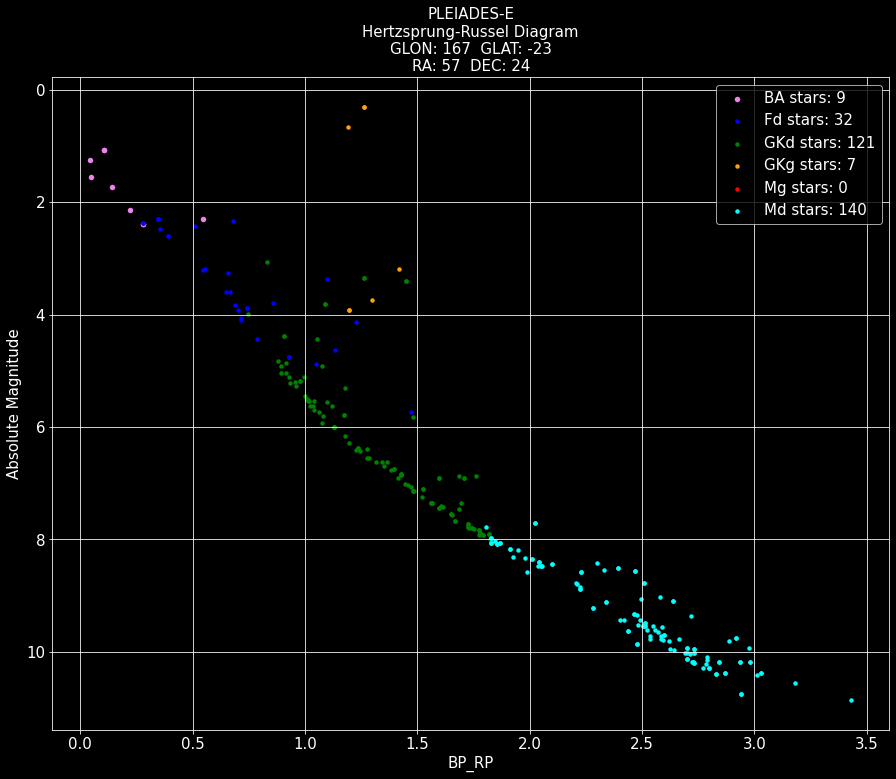

Field: PLEIADES-E    Age: 8.34 Gyr    FE_H: -0.02

Class     Age Gyr   Fe_H      AL_FE     C_FE      CA_FE     CE_FE     CI_FE     CO_FE     CR_FE     K_FE      MG_FE     MN_FE     NA_FE     N_FE      O_FE      P_FE      SI_FE     V_FE      RV        Parsecs   LightYears
Fd        4.15      -0.01     -0.09     -0.03     -0.06     nan       -0.04     0.02      -0.22     -0.02     -0.01     -0.03     0.45      0.14      nan       -0.18     -0.04     nan       5         138       452
GKd       8.52      -0.04     -0.1      -0.05     0.01      -0.06     -0.07     -0.07     -0.02     -0.0      -0.09     -0.05     -0.09     -0.07     -0.04     0.24      -0.08     0.01      6         136       444
Gkg       4.23      -0.11     0.03      -0.02     0.03      0.3       -0.04     -0.0      0.07      0.05      0.04      -0.0      0.05      0.21      0.0       0.06      0.0       -0.06     6         946       3085
Md        8.44      0.0       -0.16     -0.01     -0.02     nan       -0.04     -0.06

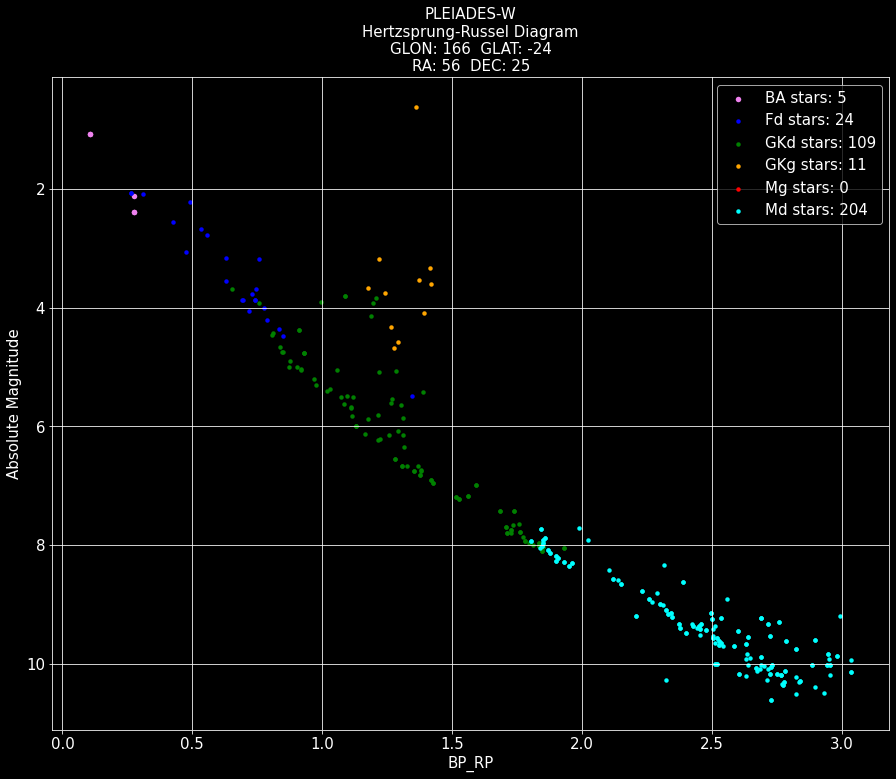

Field: PLEIADES-W    Age: 8.38 Gyr    FE_H: -0.01

Class     Age Gyr   Fe_H      AL_FE     C_FE      CA_FE     CE_FE     CI_FE     CO_FE     CR_FE     K_FE      MG_FE     MN_FE     NA_FE     N_FE      O_FE      P_FE      SI_FE     V_FE      RV        Parsecs   LightYears
Fd        4.18      -0.04     -0.04     0.04      -0.05     nan       0.03      0.12      -0.13     -0.01     0.01      0.03      nan       0.06      nan       nan       0.02      nan       6         135       441
GKd       8.34      -0.01     -0.09     -0.04     0.01      nan       -0.05     -0.18     0.01      0.0       -0.09     -0.04     -0.18     -0.04     -0.04     0.08      -0.09     0.03      5         137       449
Gkg       5.86      -0.34     0.12      0.02      0.08      0.23      0.03      -0.05     0.02      0.13      0.12      -0.07     0.02      0.03      0.08      0.01      0.05      nan       -8        908       2964
Md        8.48      -0.0      -0.17     -0.01     -0.0      nan       -0.03     -0.22

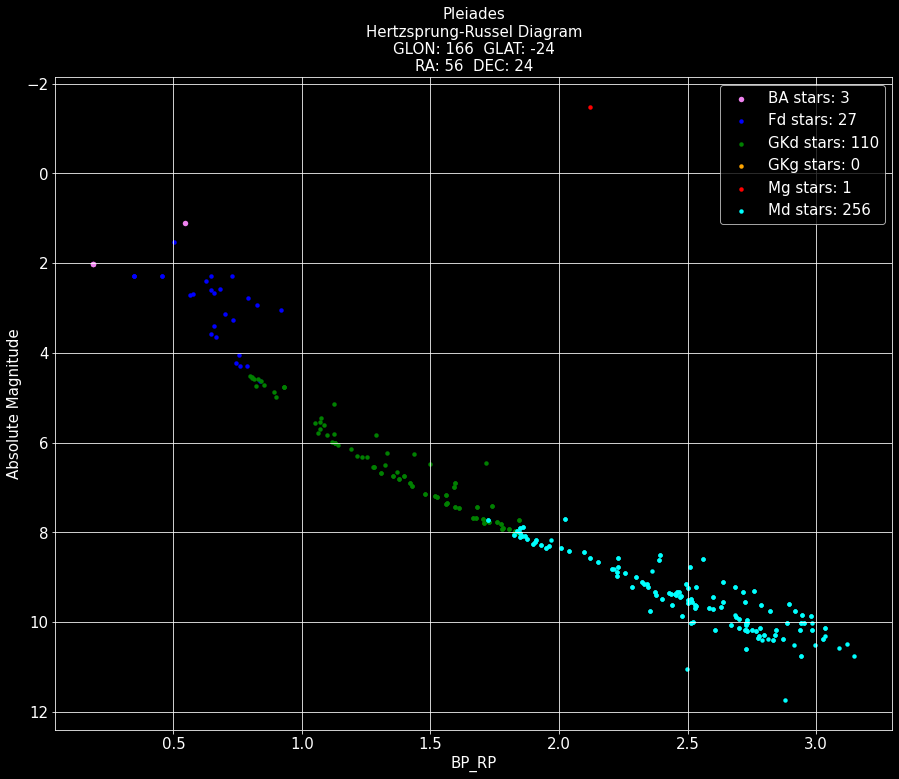

Field: Pleiades    Age: 8.5 Gyr    FE_H: 0.01

Class     Age Gyr   Fe_H      AL_FE     C_FE      CA_FE     CE_FE     CI_FE     CO_FE     CR_FE     K_FE      MG_FE     MN_FE     NA_FE     N_FE      O_FE      P_FE      SI_FE     V_FE      RV        Parsecs   LightYears
Fd        3.44      -0.02     -0.08     -0.02     -0.02     nan       0.0       0.02      -0.12     0.01      0.01      -0.03     -1.49     -0.05     nan       nan       0.05      nan       6         205       671
GKd       8.69      -0.02     -0.12     -0.05     0.0       nan       -0.05     -0.25     -0.01     0.01      -0.08     -0.08     nan       -0.07     -0.04     nan       -0.1      0.05      5         136       444
Md        8.51      0.02      -0.18     -0.0      -0.03     nan       -0.03     -0.16     -0.13     nan       -0.0      -0.12     nan       -0.06     -0.03     nan       -0.04     nan       5         135       442
Mg        6.31      -0.54     -0.02     0.01      0.06      nan       0.01      0.08      

In [21]:
fields = PLEIADES_Young_Clusters #Globular_Clusters #cluster_gc

for field in fields:
    f1 = df_Apogee[df_Apogee['FIELD'] == field]
    Plot002(f1)
    
    ff1 = f1[(f1['FE_H'] > -9999) & (f1['FE_H'] < 9999)]
    AGE1 = float(round(ff1.age.median(),2))
    FEH1 = float(round(ff1.FE_H.median(),2))
    print("Field: " + str(field) + "    Age: " + str(AGE1) + " Gyr    FE_H: " + str(FEH1))

    Plot002B(f1, field)